In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv("./fraudTrain.csv")
data_test = pd.read_csv("./fraudTest.csv")

In [3]:
data_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# EDA

In [5]:
data_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
for col in data_train.columns:
  print(col, data_train[col].nunique())

Unnamed: 0 1296675
trans_date_trans_time 1274791
cc_num 983
merchant 693
category 14
amt 52928
first 352
last 481
gender 2
street 983
city 894
state 51
zip 970
lat 968
long 969
city_pop 879
job 494
dob 968
trans_num 1296675
unix_time 1274823
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [7]:
data_train.drop(columns=['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'state', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)
data_test.drop(columns=['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'state', 'zip', 'trans_num', 'unix_time'], axis=1, inplace=True)

In [8]:
data_train['trans_date_trans_time'] = pd.to_datetime(data_train['trans_date_trans_time'])
data_train['dob'] = pd.to_datetime(data_train['dob'])
data_test['trans_date_trans_time'] = pd.to_datetime(data_test['trans_date_trans_time'])
data_test['dob'] = pd.to_datetime(data_test['dob'])

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [10]:
for col in data_train.columns:
  print(col, data_train[col].nunique())

trans_date_trans_time 1274791
cc_num 983
category 14
amt 52928
gender 2
city 894
lat 968
long 969
city_pop 879
job 494
dob 968
merch_lat 1247805
merch_long 1275745
is_fraud 2


In [11]:
data_train.isnull().any()

trans_date_trans_time    False
cc_num                   False
category                 False
amt                      False
gender                   False
city                     False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

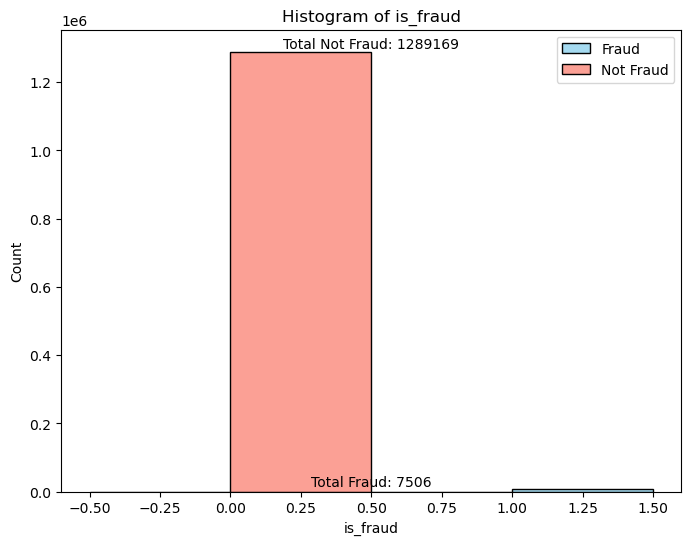

In [12]:
fraud_data_train = data_train[data_train['is_fraud'] == 1]
not_fraud_data_train = data_train[data_train['is_fraud'] == 0]

plt.figure(figsize=(8, 6))

sns.histplot(fraud_data_train['is_fraud'], bins=2, kde=False, color='skyblue', label='Fraud')
sns.histplot(not_fraud_data_train['is_fraud'], bins=2, kde=False, color='salmon', label='Not Fraud')

plt.title('Histogram of is_fraud')
plt.xlabel('is_fraud')
plt.ylabel('Count')

plt.text(0.5, len(fraud_data_train) + 1, f'Total Fraud: {len(fraud_data_train)}', ha='center', va='bottom')
plt.text(0.5, len(not_fraud_data_train) + 1, f'Total Not Fraud: {len(not_fraud_data_train)}', ha='center', va='bottom')

plt.legend()
plt.show()

# EDA FOR trans_date_trans_time

In [13]:
data_train['hour'] = data_train['trans_date_trans_time'].dt.hour

hourly_counts = data_train['hour'].value_counts()

print(hourly_counts)

hour
23    67104
22    66982
18    66051
16    65726
21    65533
19    65508
17    65450
15    65391
13    65314
12    65257
20    65098
14    64885
1     42869
3     42769
2     42656
8     42505
0     42502
6     42300
10    42271
7     42203
9     42185
5     42171
11    42082
4     41863
Name: count, dtype: int64


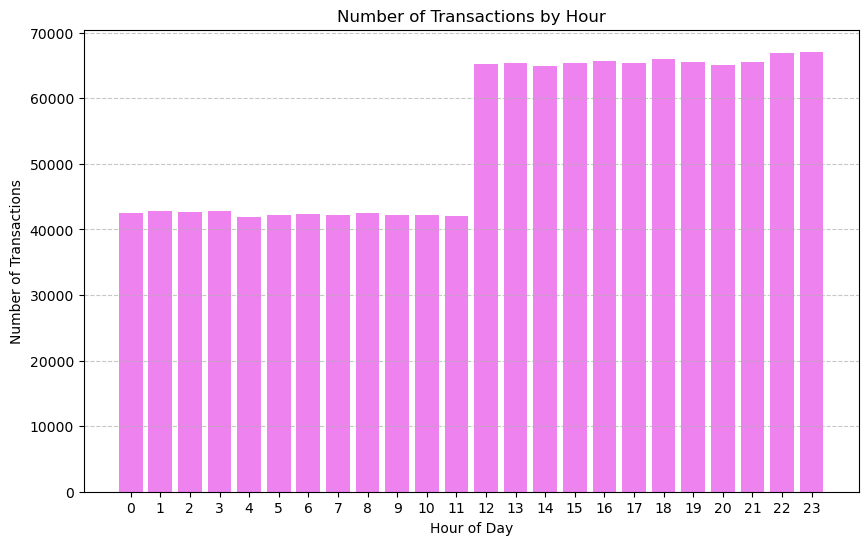

In [14]:
data_train['hour'] = data_train['trans_date_trans_time'].dt.hour

hourly_counts = data_train['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='violet')

plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

plt.xticks(hourly_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. **Peak Transaction Hours (12:00 - 23:00)**:
   - The highest number of transactions occur during this time period, with transaction volumes consistently ranging between 64,000 to 68,000. This indicates that business or consumption activities are concentrated during the afternoon and evening hours.

2. **Early Hours of the Day (00:00 - 11:00)**:
   - During this period, transaction volumes are lower but stable, ranging between 41,000 to 43,000. This suggests that transaction activities are lower in the early morning, possibly due to business activities not yet reaching peak levels or other factors such as consumer habits.

Therefore, these patterns can inform operational planning and business strategies, such as resource management and scheduling to optimize services or offerings during peak times, and efficiently manage operations during periods of lower transaction volumes.

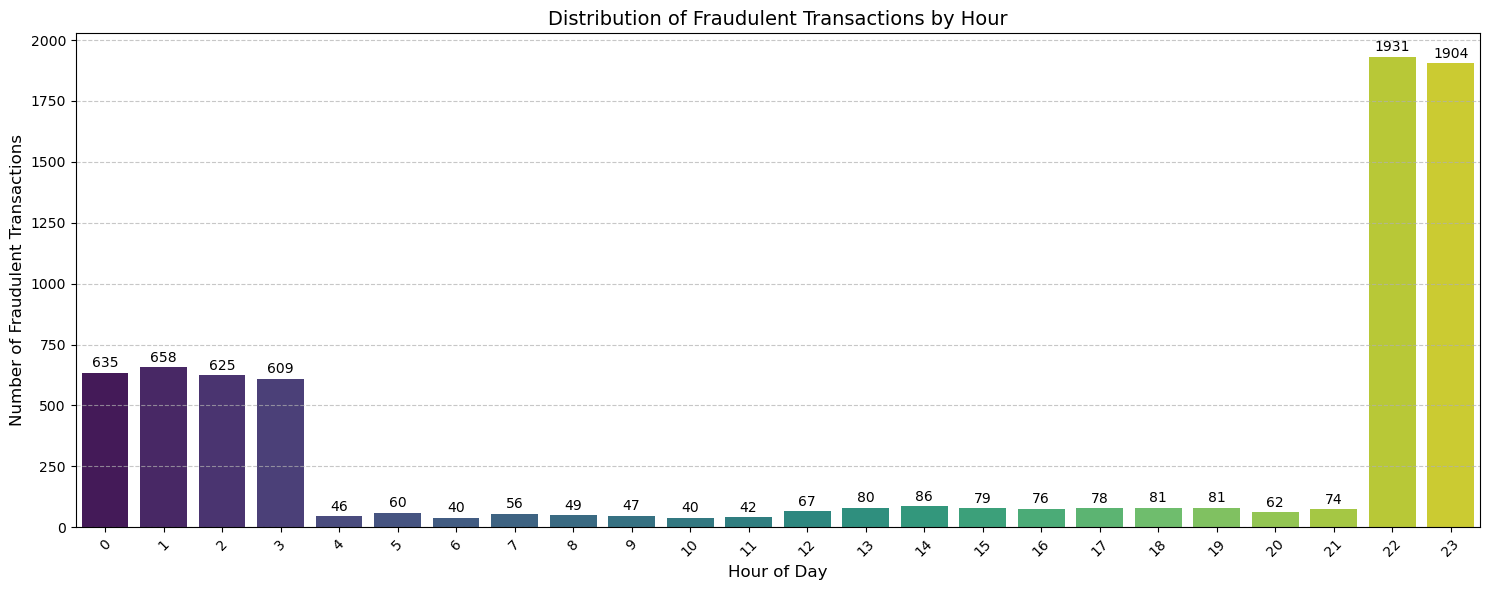

In [15]:
fraud_transactions = data_train[data_train['is_fraud'] == 1]

fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour


fraud_by_hour = fraud_transactions['hour'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette='viridis')

plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Distribution of Fraudulent Transactions by Hour', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(fraud_by_hour.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

1. Hours with Moderate Fraud Potential (00:00 - 03:00):

During this time range (00:00 - 03:00), the number of fraudulent transactions ranges between 609 and 658.
This period indicates significant fraudulent transaction activity, although not as high as peak hours.

2. Hours with Highest Fraud Potential (22:00 and 23:00):

At 22:00 and 23:00, fraudulent transactions reach their peak, ranging between 1904 and 1931 transactions.
These hours represent times when fraudulent activity is notably higher compared to other hours.

Daily Patterns: There is a clear pattern in the distribution of fraudulent transactions by hour. Certain hours tend to have higher incidences of fraud, particularly late evening hours (22:00 - 03:00).

Focus on Peak Hours: Further scrutiny or enhanced monitoring may be necessary during peak hours such as 22:00 and 23:00 to identify and prevent fraudulent transactions.

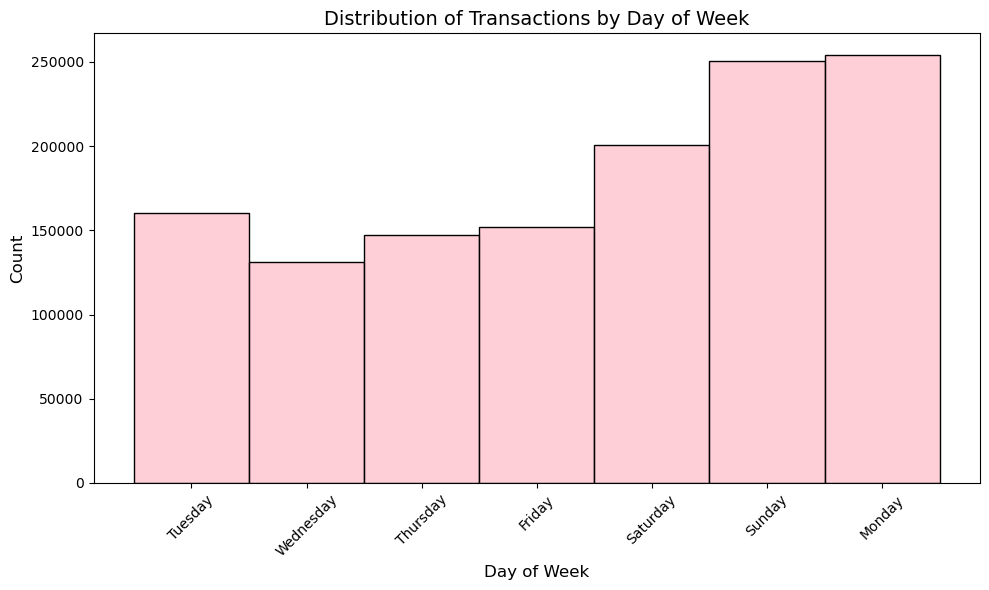

In [16]:
#safe time and risk time categories based on hour
data_train['category_time'] = pd.cut(data_train['trans_date_trans_time'].dt.hour,
                               bins=[0, 4, 22, 24],
                               labels=['Medium Fraud', 'Low Fraud', 'High Fraud'],
                               right=False,
                               include_lowest=True)

# Map day of week based on trans_date_trans_time
data_train['day_of_week'] = data_train['trans_date_trans_time'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.histplot(data_train['day_of_week'], bins=7, kde=False, color='pink')

plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Transactions by Day of Week', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the data:

- Transactions peak on **Monday and Sunday**, with a range of **around 250,000 transactions**.
- **Wednesday** sees the fewest transactions, totaling approximately **130,000 transactions**.

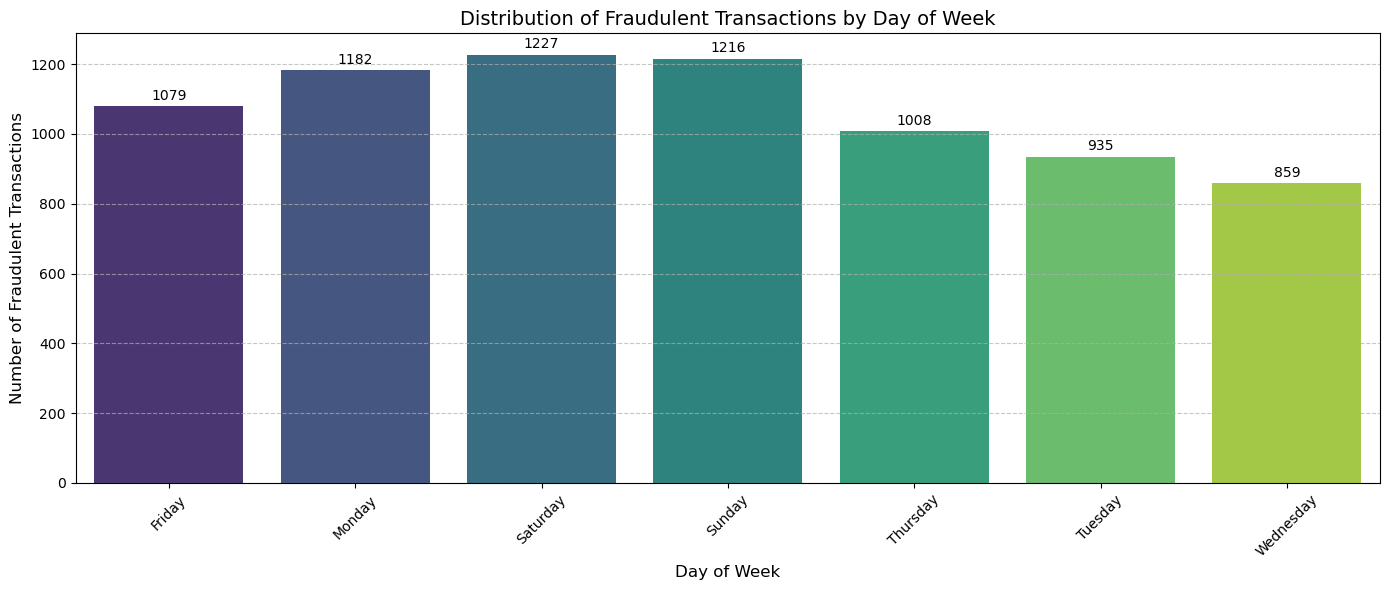

In [17]:
fraud_transactions = data_train[data_train['is_fraud'] == 1]

fraud_transactions['day_of_week'] = fraud_transactions['trans_date_trans_time'].dt.day_name()

fraud_by_day = fraud_transactions['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette='viridis')

plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Distribution of Fraudulent Transactions by Day of Week', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(fraud_by_day.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Based on the data visualization:

- Fraudulent transactions vary slightly by day of the week, with the most frequent occurrences on **Monday, Saturday, and Sunday**, each averaging around **1200 transactions**.
- Wednesday consistently sees the fewest fraudulent transactions, totaling **859 transactions**.

The analysis reveals that fraudulent transaction volumes exhibit minimal variation across different days of the week. However, Mondays, Saturdays, and Sundays emerge as the days with the highest incidence of fraud, each registering approximately 1200 transactions. In contrast, Wednesdays consistently record the lowest number of fraudulent transactions, amounting to 859 transactions. This pattern suggests a potential trend in fraudulent activity that could inform strategic measures for prevention and detection efforts on higher-risk days versus lower-risk days.

# EDA for "category" feature

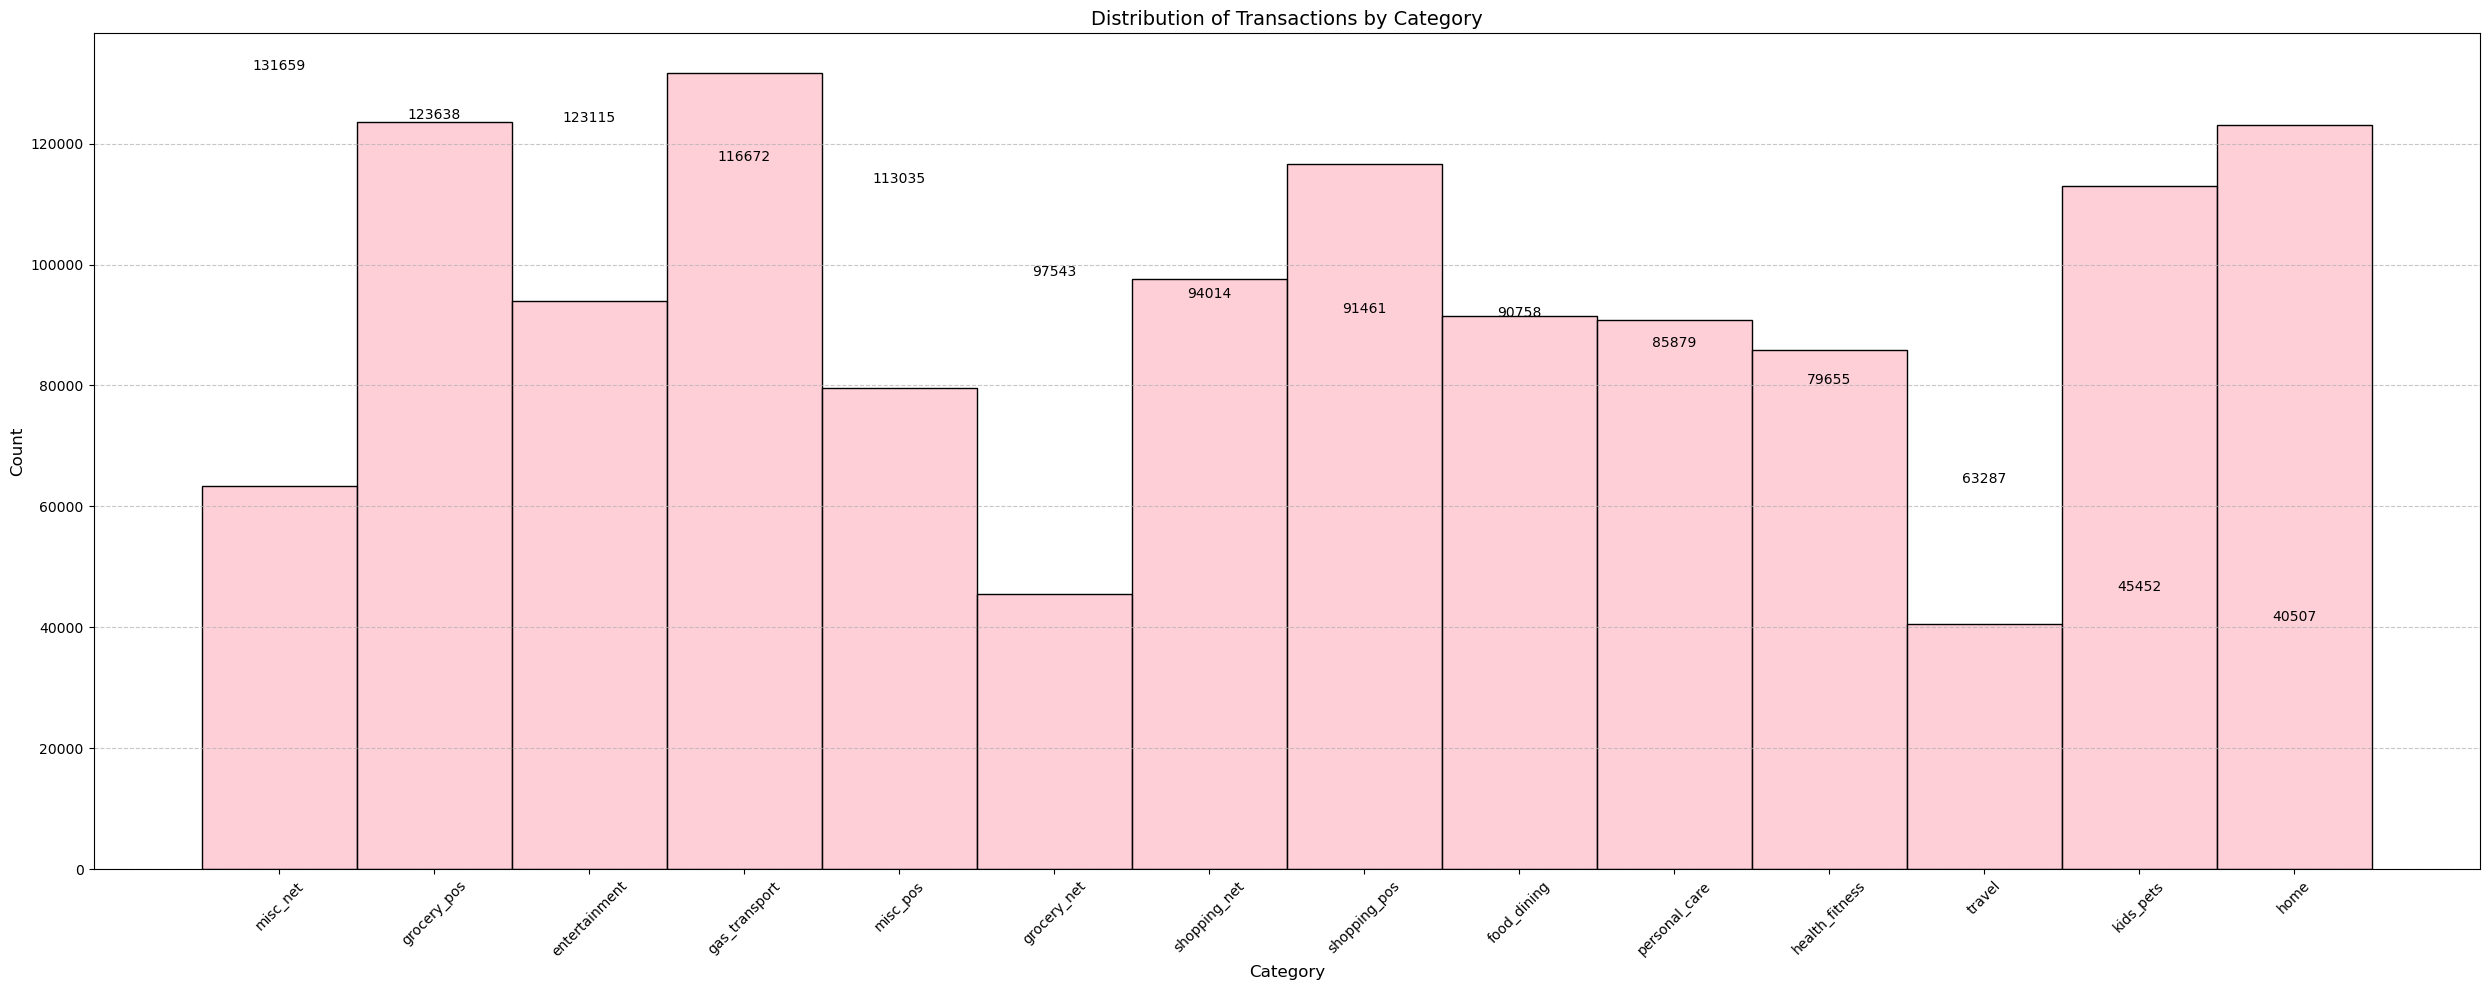

Description of 'category' column:
count           1296675
unique               14
top       gas_transport
freq             131659
Name: category, dtype: object

Value counts of each category:
category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64


In [18]:
category_description = data_train['category'].describe()
category_counts = data_train['category'].value_counts()

plt.figure(figsize=(25, 10))
sns.histplot(data_train['category'], bins=len(category_counts), kde=False, color='pink')

plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Transactions by Category', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(category_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("Description of 'category' column:")
print(category_description)
print("\nValue counts of each category:")
print(category_counts)

Based on the visualization above, the distribution of fraudulent transactions by category can be categorized into three groups:

1. Categories with the highest number of fraudulent transactions, notably **grocery_pos** and **shopping_net**, each totaling around 1700 transactions.

2. Categories with moderate levels of fraudulent transactions include **gas_transport, misc_net, and shopping_pos**, ranging between 618 to 915 transactions.

3. The remaining categories exhibit the lowest incidence of fraudulent transactions, ranging from 116 to 250 transactions.

The visualization highlights distinct patterns in fraudulent transactions across different categories. Categories such as **grocery_pos** and **shopping_net** stand out with significantly higher incidences of fraud, indicating potential vulnerabilities or higher transaction volumes susceptible to fraudulent activities. Conversely, categories like **gas_transport, misc_net, and shopping_pos** show moderate levels of fraud, suggesting varying degrees of security measures or fraud detection efficacy across different sectors. Categories with lower fraud rates reflect better control measures or lower transaction volumes in terms of fraudulent activities. This categorization helps identify priority areas for targeted fraud prevention strategies and reinforces the importance of tailored security measures based on transaction category dynamics.

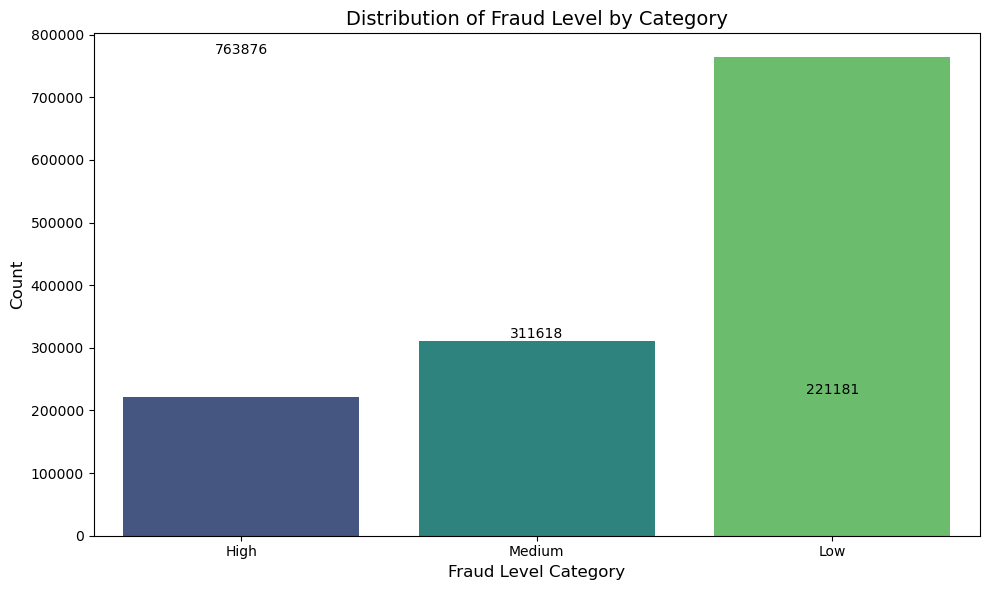

Value counts of Fraud Level Category:
Fraud_Level_Category
Low       763876
Medium    311618
High      221181
Name: count, dtype: int64


In [19]:
data_train['Fraud_Level_Category'] = data_train['category'].apply(lambda x: 'High' if x in ['grocery_pos', 'shopping_net'] else 
                                                      'Medium' if x in ['gas_transport', 'misc_net', 'shopping_pos'] else 
                                                      'Low')

fraud_level_counts = data_train['Fraud_Level_Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data_train, x='Fraud_Level_Category', palette='viridis', order=['High', 'Medium', 'Low'])

plt.xlabel('Fraud Level Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Fraud Level by Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, count in enumerate(fraud_level_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
print("Value counts of Fraud Level Category:")
print(fraud_level_counts)

Based on the output and visualization of `Fraud_Level_Category`:

- **Low Fraud Level Category**: There are 763,876 transactions categorized as 'Low' fraud level. These categories include transactions where the fraud occurrence is relatively low compared to others.

- **Medium Fraud Level Category**: There are 311,618 transactions categorized as 'Medium' fraud level. This category includes transactions where there is a moderate level of fraud risk, involving categories like gas_transport, misc_net, and shopping_pos.

- **High Fraud Level Category**: There are 221,181 transactions categorized as 'High' fraud level. This category includes transactions with the highest risk of fraud, particularly involving categories like grocery_pos and shopping_net.


The visualization effectively categorizes transactions into different fraud levels based on their respective categories. It reveals that while a significant portion of transactions falls under the 'Low' fraud level, there are notable concentrations in the 'Medium' and 'High' categories, especially in categories known to be more susceptible to fraudulent activities. This categorization can aid in focusing fraud prevention efforts and resource allocation towards categories with higher risk, thereby enhancing overall security and reducing potential financial losses.

In [20]:
fraud_by_category = fraud_transactions['category'].value_counts().sort_index()
print(fraud_by_category)

category
entertainment      233
food_dining        151
gas_transport      618
grocery_net        134
grocery_pos       1743
health_fitness     133
home               198
kids_pets          239
misc_net           915
misc_pos           250
personal_care      220
shopping_net      1713
shopping_pos       843
travel             116
Name: count, dtype: int64


In [21]:
def categorize_risk_by_category(category):
    if category in ['gas_transport', 'misc_net', 'shopping_pos']:
        return 3
    elif category in ['grocery_pos', 'shopping_net']:
        return 4
    elif category in ['entertainment', 'health_fitness', 'home', 'kids_pets', 'personal_care']:
        return 2
    elif category in ['food_dining', 'grocery_net', 'misc_pos', 'travel']:
        return 1
    else:
        return 0

In [22]:
data_train['risk_category_by_category'] = data_train['category'].apply(categorize_risk_by_category)
data_test['risk_category_by_category'] = data_test['category'].apply(categorize_risk_by_category)

risk_category_counts_train = data_train['risk_category_by_category'].value_counts().sort_index()
risk_category_counts_test = data_test['risk_category_by_category'].value_counts().sort_index()

print("\nValue Counts for data_train:")
print(risk_category_counts_train)

print("\nValue Counts for data_test:")
print(risk_category_counts_test)


Value Counts for data_train:
risk_category_by_category
1    257075
2    506801
3    311618
4    221181
Name: count, dtype: int64

Value Counts for data_test:
risk_category_by_category
1    110717
2    217142
3    133528
4     94332
Name: count, dtype: int64


# EDA for "AMT" feature

In [23]:
print("Summary statistics of transaction amount:")
print(data_train['amt'].describe())

print(f"Smallest transaction: $ {data_train['amt'].min()}")
print(f"Largest transaction: $ {data_train['amt'].max()}")
print(f"Mean transaction: $ {data_train['amt'].mean()}")
print(f"Median transaction: $ {data_train['amt'].median()}")
print(f"Mode transaction: $ {data_train['amt'].mode()[0]}")

Summary statistics of transaction amount:
count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64
Smallest transaction: $ 1.0
Largest transaction: $ 28948.9
Mean transaction: $ 70.35103545607033
Median transaction: $ 47.52
Mode transaction: $ 1.14


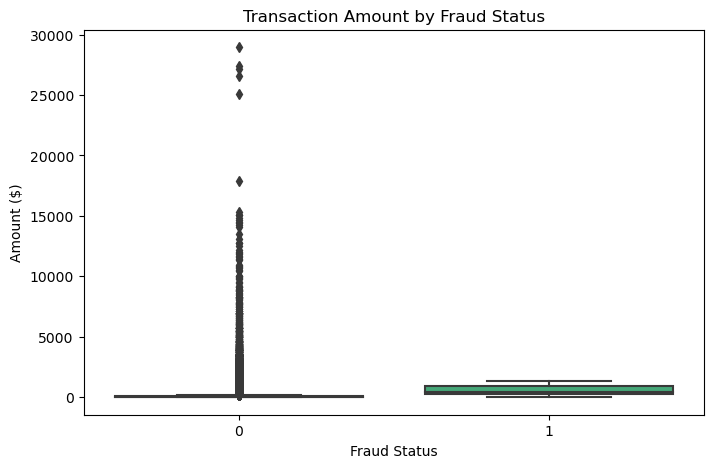

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_train['is_fraud'], y=data_train['amt'], palette='viridis')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Amount ($)')
plt.show()

The boxplot is divided into two categories based on the `Fraud Status` (`0` for non-fraud and presumably `1` for fraud).

   - **Non-Fraudulent Transactions**: The presence of numerous outliers in non-fraudulent transactions suggests variability in transaction amounts. These outliers could represent legitimate but atypical transactions, such as large purchases or transactions occurring under unique circumstances.

In [25]:
data_train['amt'][data_train['amt']==0].any()

False

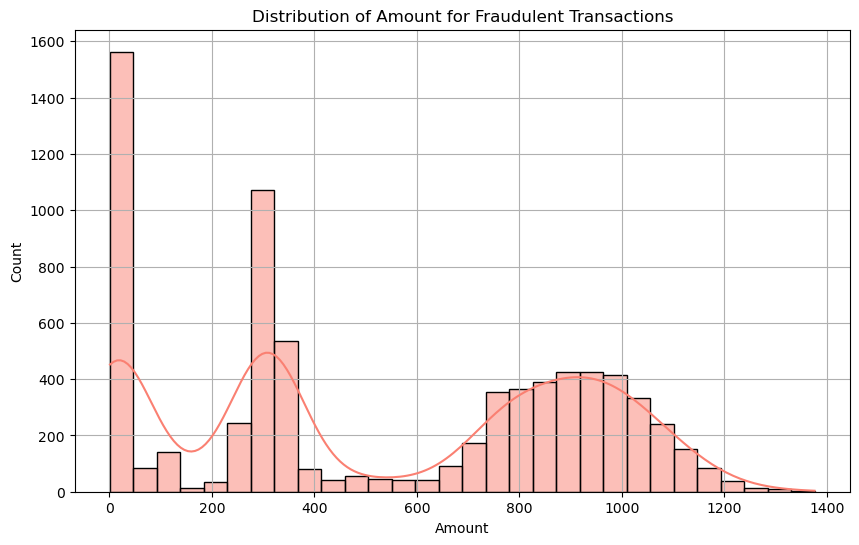

In [26]:
data_fraud = data_train[data_train['is_fraud'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(data_fraud['amt'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Distribution of Amount for Fraudulent Transactions')
plt.grid(True)
plt.show()

- **Distribution Pattern**: The histogram shows a wavy pattern, indicating that fraudulent transactions vary across different amounts rather than following a smooth distribution.
- **Peak Frequencies**: Peaks in the histogram suggest certain transaction amounts are more common in fraudulent activities.
- **Insight**: This visualization helps identify specific transaction amounts or ranges that may be targeted more frequently for fraudulent purposes.

# EDA for "Gender" Feature

In [27]:
data_train['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

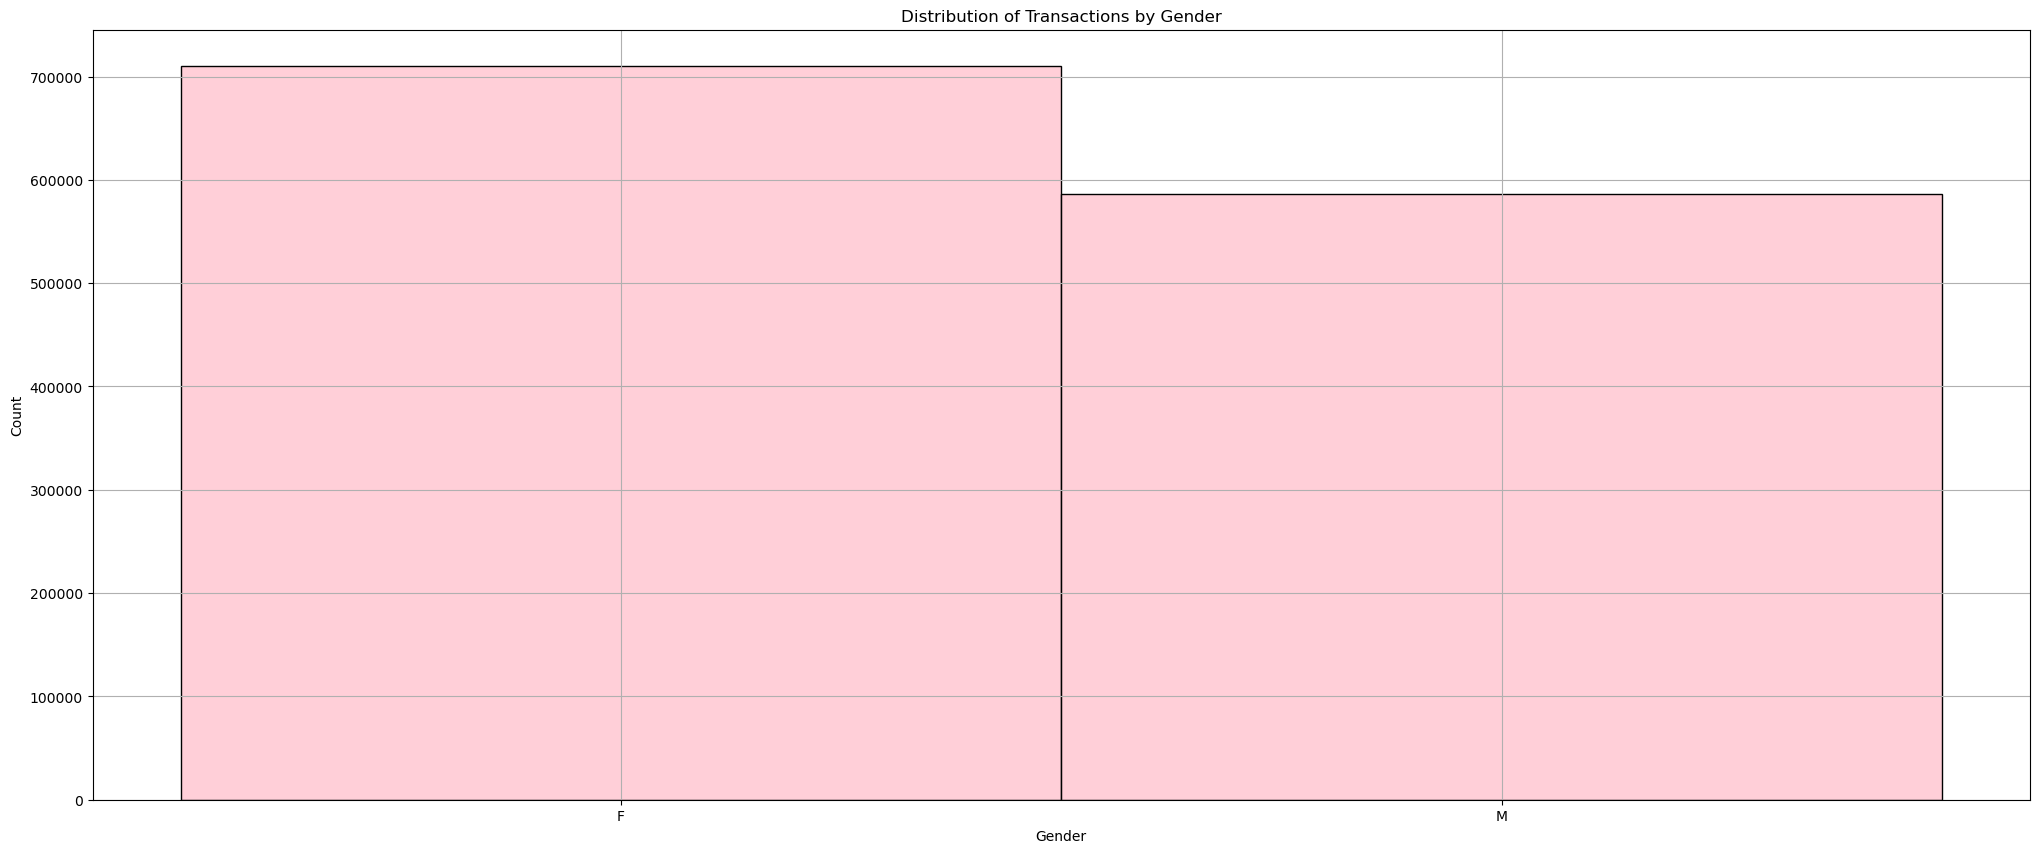

In [28]:
plt.figure(figsize=(25, 10))
sns.histplot(data_train['gender'], bins=30, kde=False, color='pink', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Transactions by Gender')
plt.grid(True)
plt.show()

From the histogram, it's evident that the number of transactions categorized under 'Female' is higher compared to 'Male'.

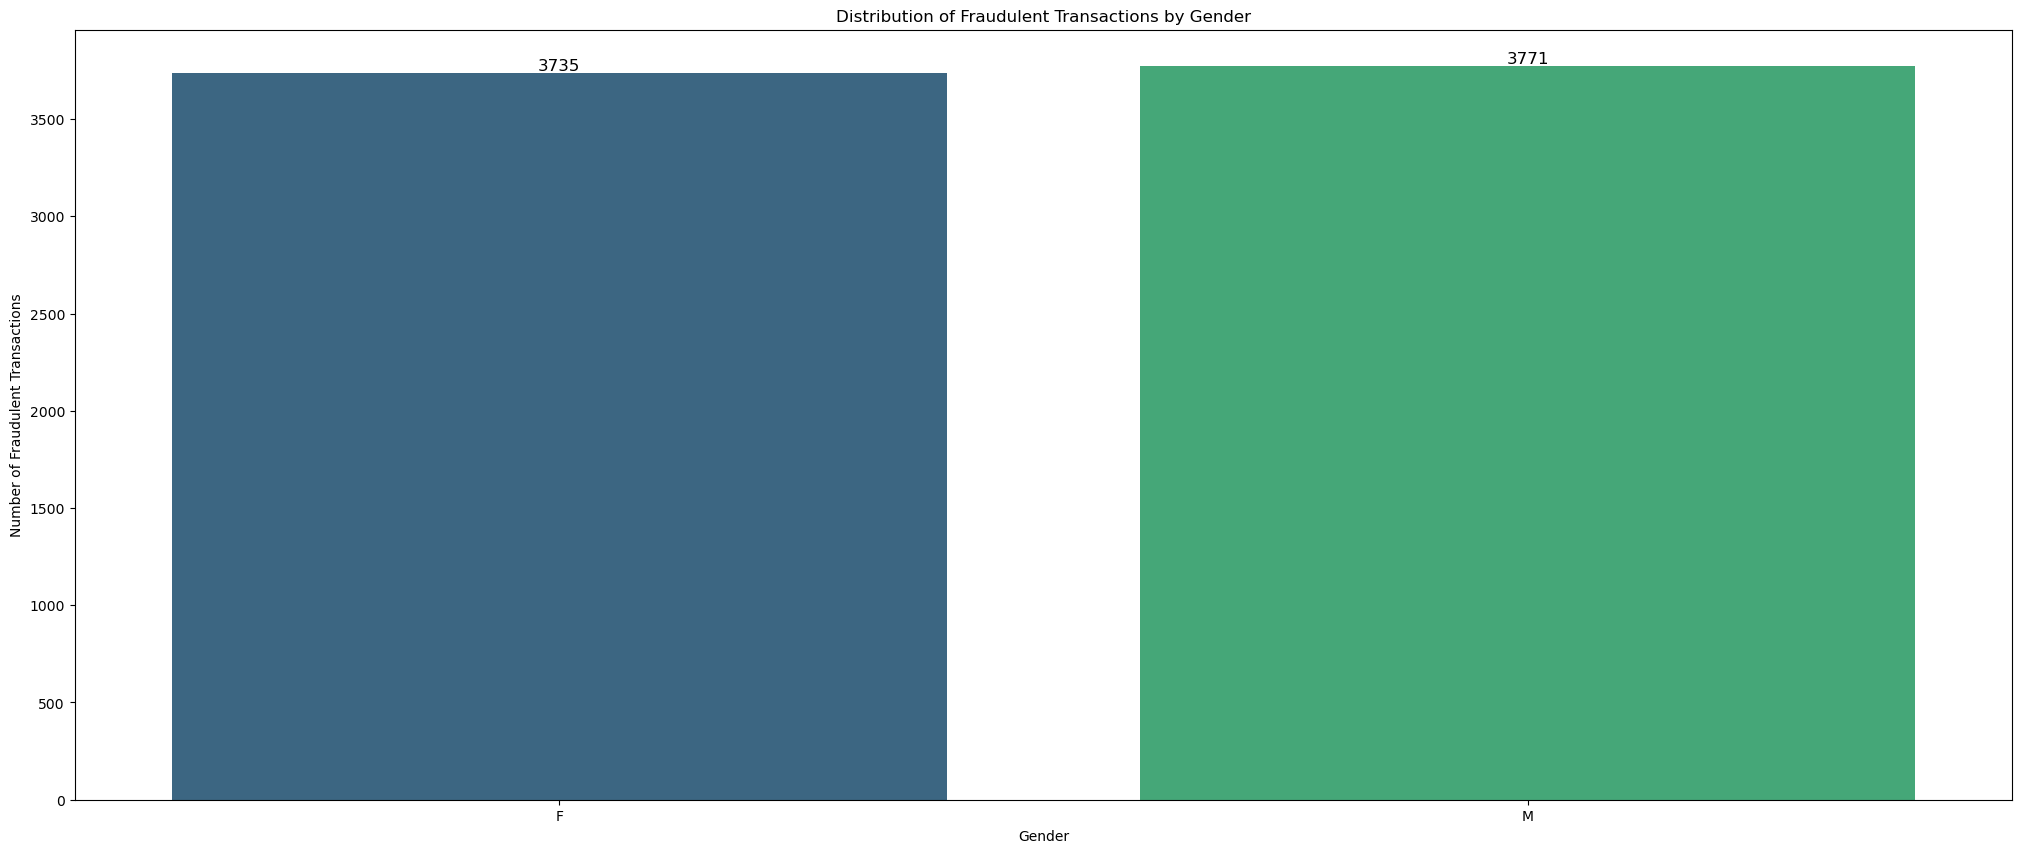

In [29]:
fraud_by_gender = fraud_transactions['gender'].value_counts().sort_index()
plt.figure(figsize=(25, 10))
sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Gender')

for index, value in enumerate(fraud_by_gender.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Show plot
plt.show()

The number of fraudulent transactions for females (F) is 3,735.
The number of fraudulent transactions for males (M) is 3,771.
From this data, it can be concluded that the number of fraudulent transactions between females and males is quite close, with a relatively small difference between gender.

# EDA for "city and city_pop" feature

Number of unique cities: 894


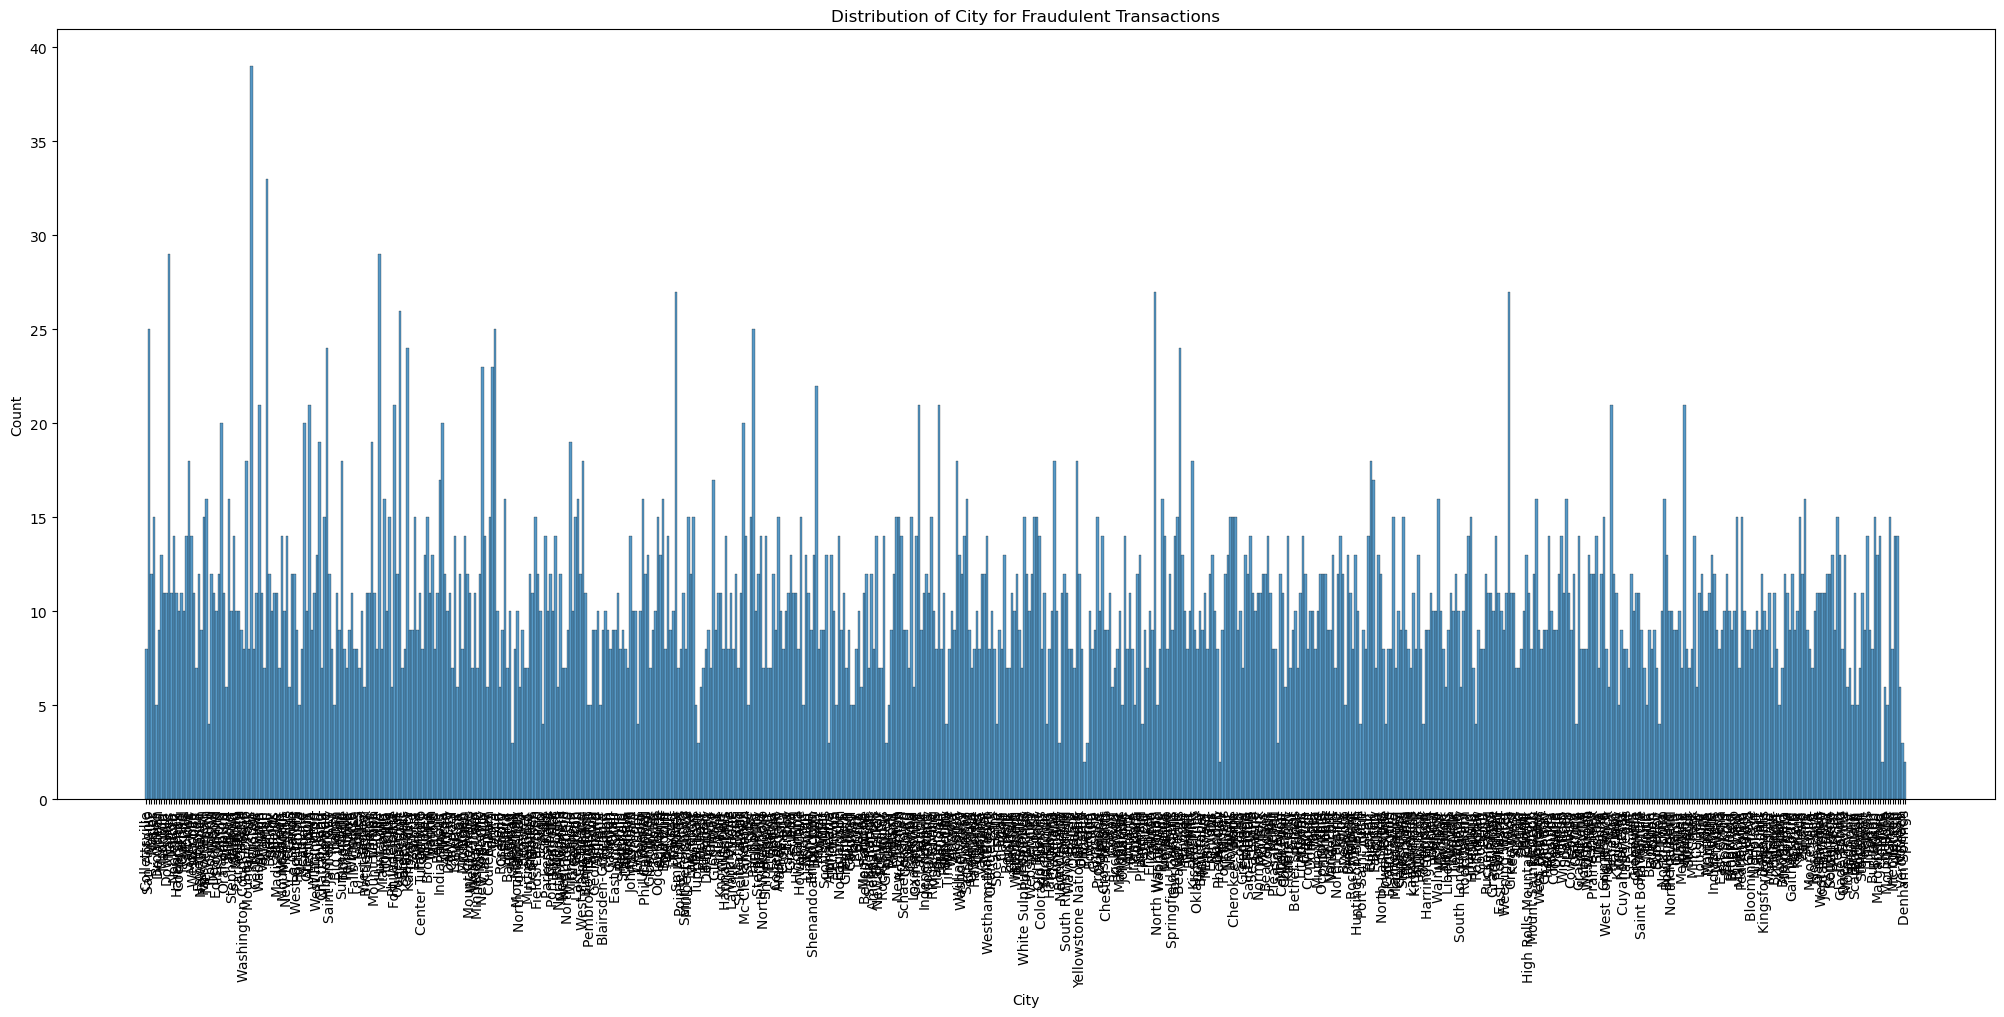

In [30]:
print("Number of unique cities:", data_train['city'].nunique())

plt.figure(figsize=(25, 10))
sns.histplot(data_fraud['city'], bins=data_fraud['city'].nunique(), palette='viridis')
plt.title('Distribution of City for Fraudulent Transactions')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

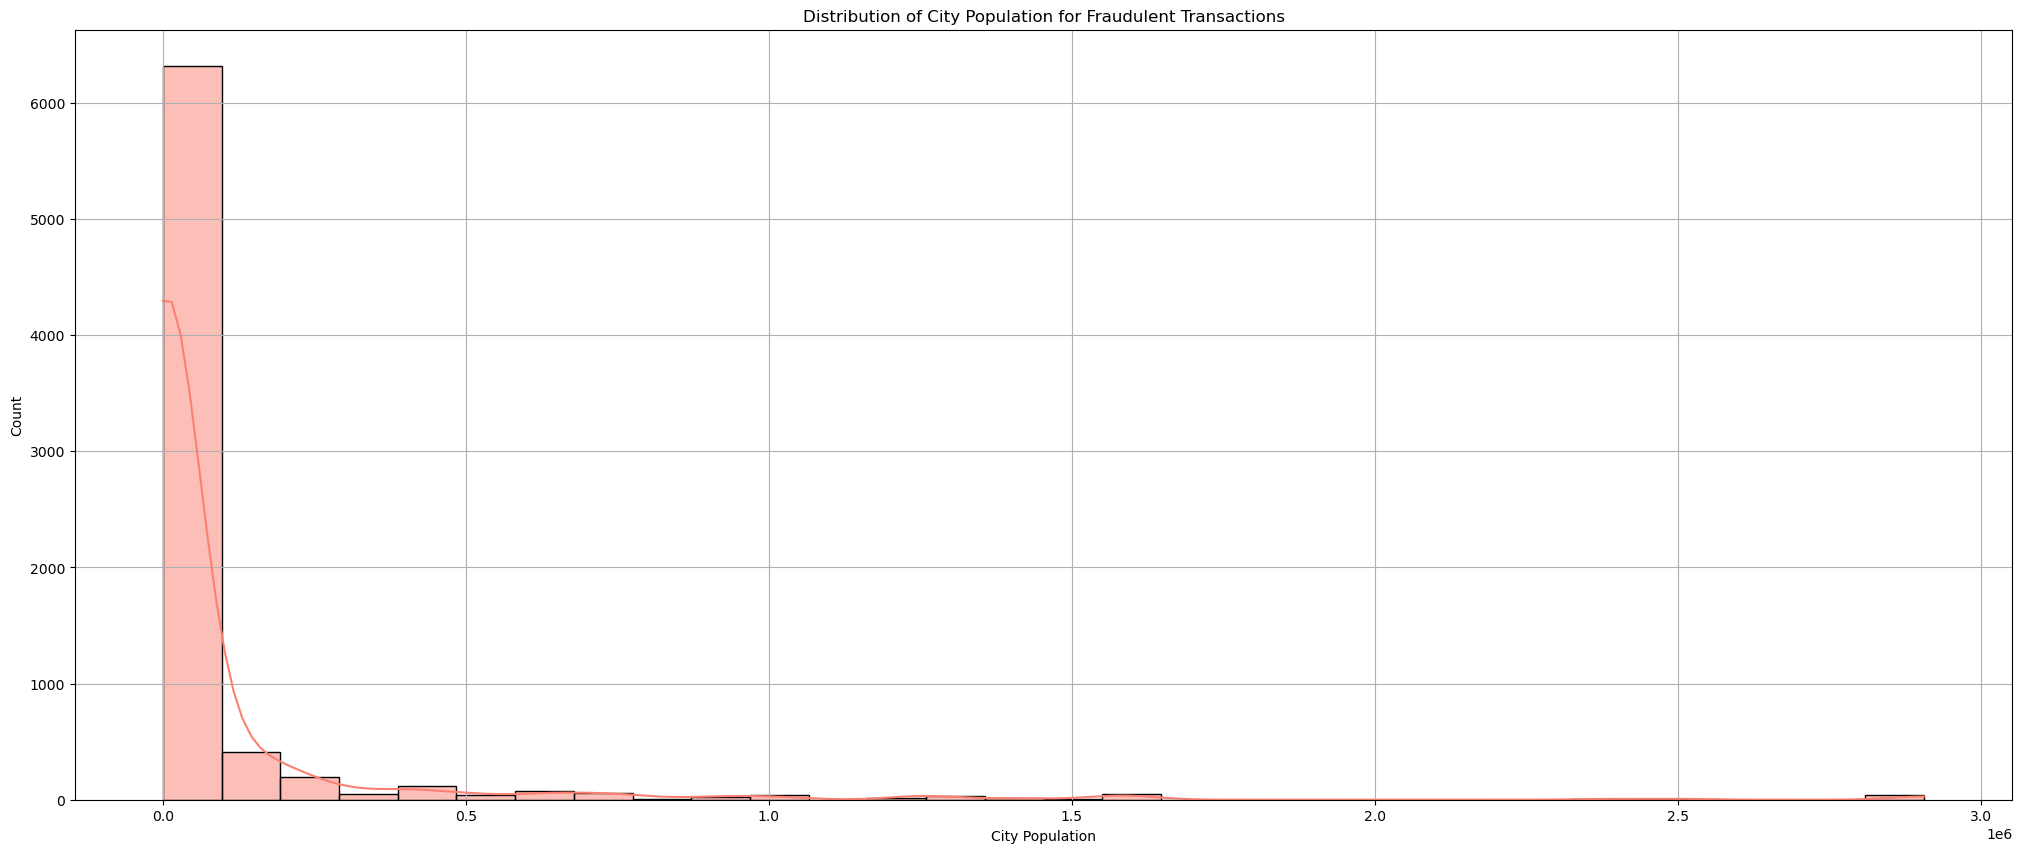

In [31]:
plt.figure(figsize=(25, 10))
sns.histplot(data_fraud['city_pop'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Distribution of City Population for Fraudulent Transactions')
plt.xlabel('City Population')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# EDA for lat,log. merchant lat,merchant long feature

In [32]:
import numpy as np

def haversine_distance(origin, destination):
  lat1, lon1 = origin
  lat2, lon2 = destination
  radius = 6371  #in kilometers

  dlat = np.radians(lat2 - lat1)
  dlon = np.radians(lon2 - lon1)

  a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
  distance = radius * c

  return distance

data_train['distance'] = haversine_distance((data_train['lat'], data_train['long']), (data_train['merch_lat'], data_train['merch_long']))
data_test['distance'] = haversine_distance((data_test['lat'], data_test['long']), (data_test['merch_lat'], data_test['merch_long']))

In [33]:
data_train['distance'].describe()

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: distance, dtype: float64

In [34]:
print(f'Closest Distance: {data_train["distance"].min()} km')
print(f'Farthest Distance: {data_train["distance"].max()} km')
print(f'Mean Distance: {data_train["distance"].mean()} km')
print(f'Median Distance: {data_train["distance"].median()} km')
print(f'Mode Distance: {data_train["distance"].mode()[0]} km')

Closest Distance: 0.022254515638296814 km
Farthest Distance: 152.11717310594904 km
Mean Distance: 76.11465060395156 km
Median Distance: 78.2317512923314 km
Mode Distance: 0.022254515638296814 km


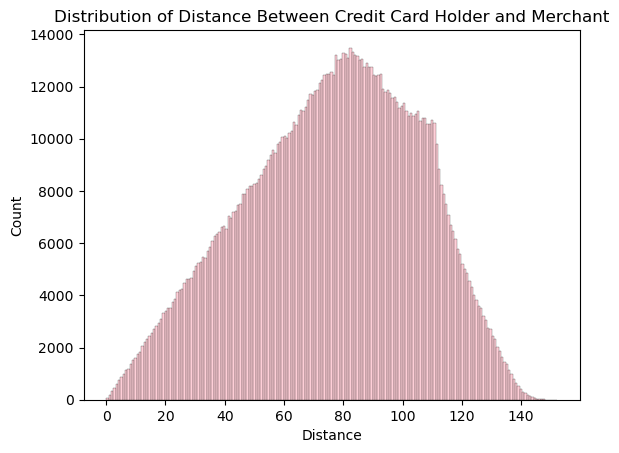

In [35]:
sns.histplot(data_train['distance'], color='pink')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Distribution of Distance Between Credit Card Holder and Merchant')
plt.show()

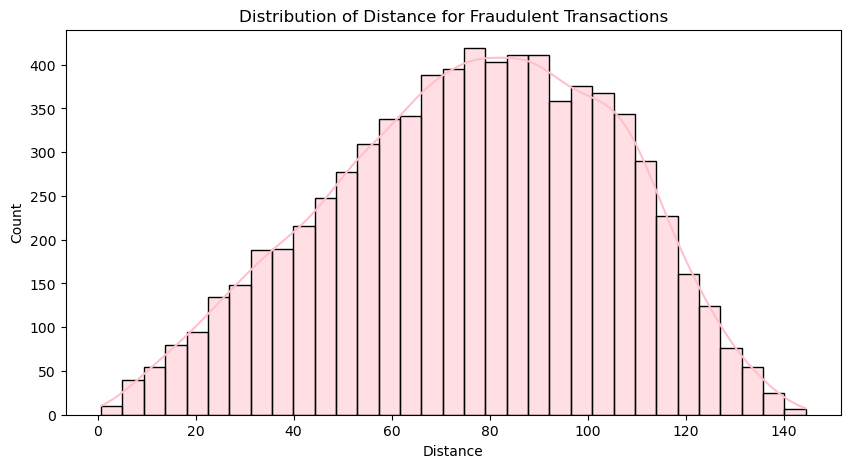

In [36]:
data_fraud = data_train[data_train['is_fraud'] == 1]

plt.figure(figsize=(10, 5))
sns.histplot(data_fraud['distance'], color='pink', kde=True)
plt.title('Distribution of Distance for Fraudulent Transactions')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

# EDA for "job" feature

Number of unique jobs: 494

Job counts:
job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64


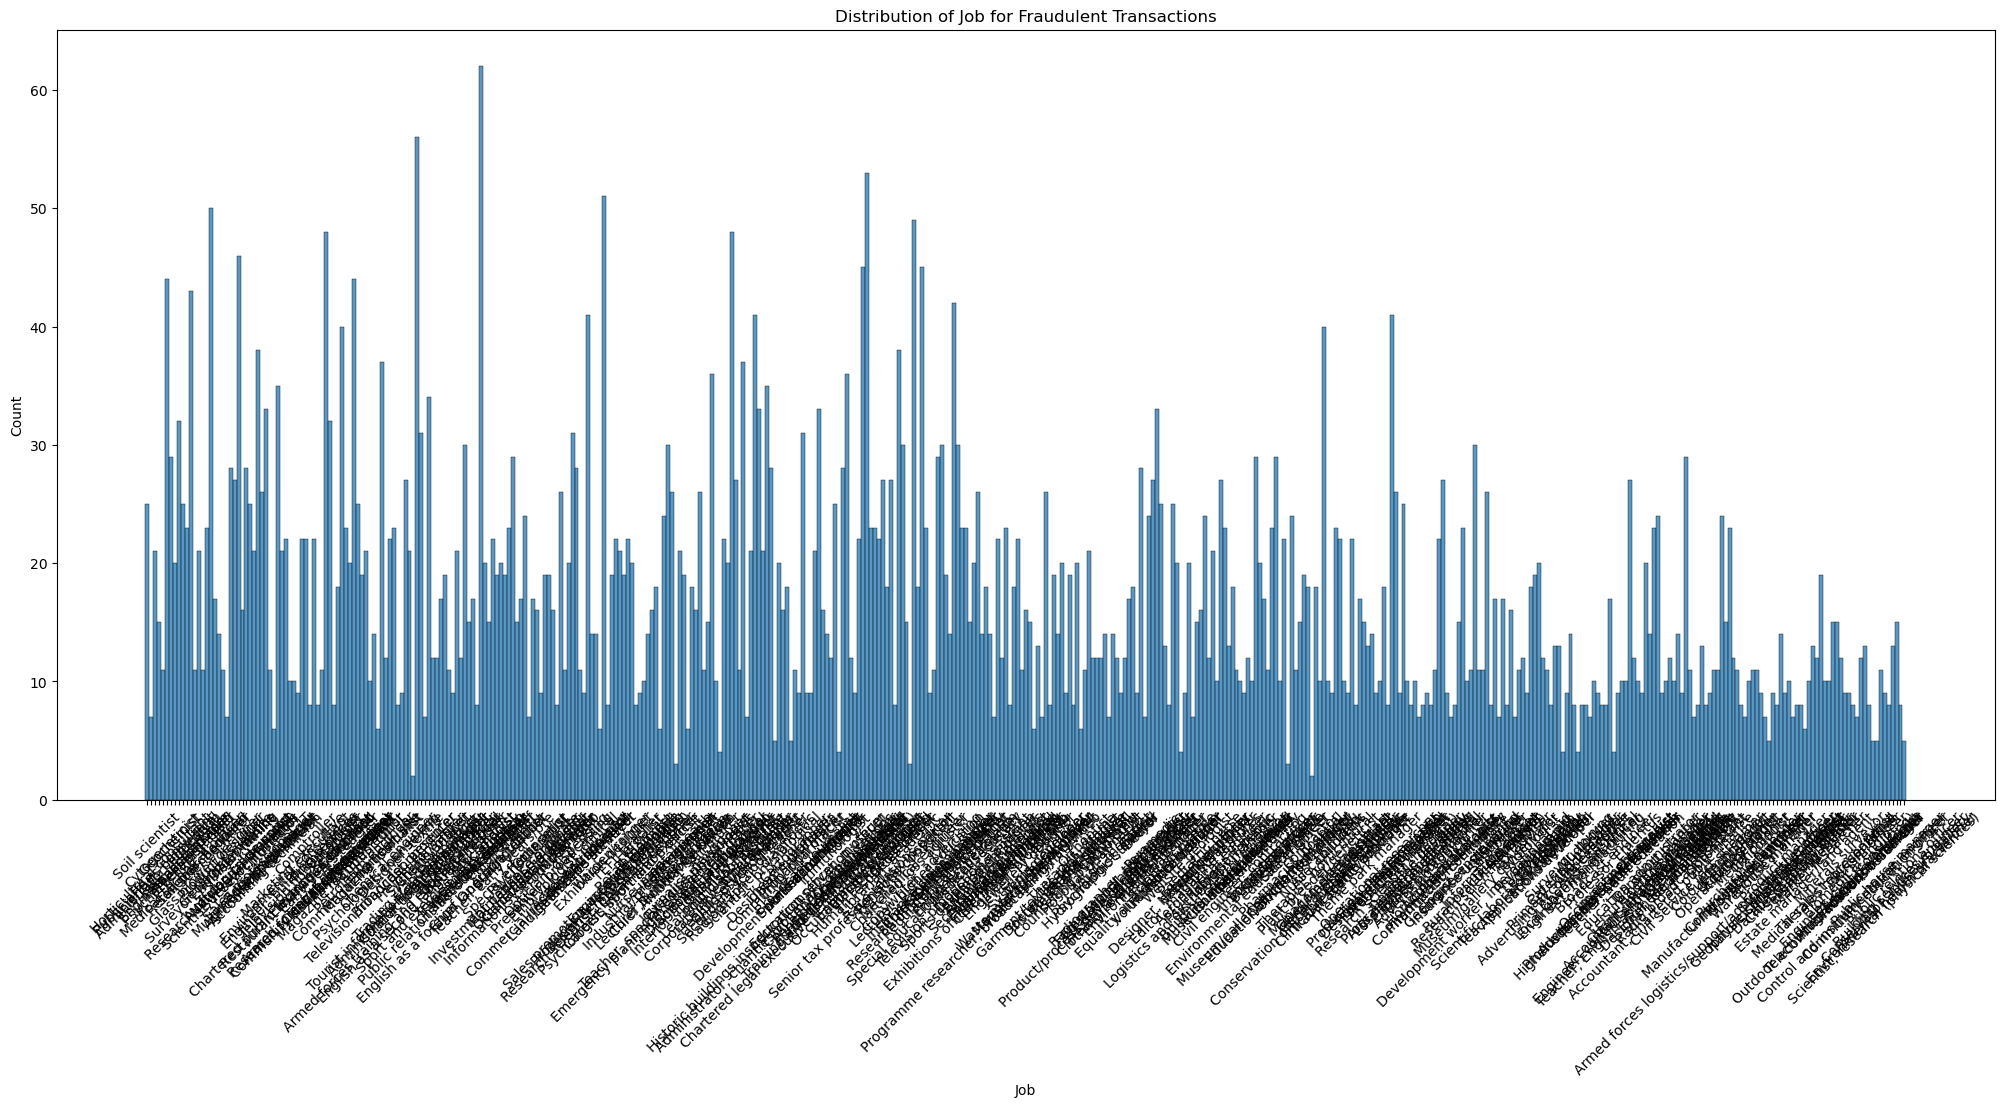

In [37]:
job_counts = data_train['job'].value_counts()
num_unique_jobs = data_train['job'].nunique()

print(f"Number of unique jobs: {num_unique_jobs}")
print("\nJob counts:")
print(job_counts)

data_fraud = data_train[data_train['is_fraud'] == 1]

plt.figure(figsize=(25, 10))
sns.histplot(data_fraud['job'], bins=num_unique_jobs, palette='viridis')
plt.title('Distribution of Job for Fraudulent Transactions')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

# EDA "age" feature

In [38]:
def calculate_age_train(trans_date_trans_time,dob):
    age_train = data_train['trans_date_trans_time'].dt.year - data_train['dob'].dt.year
    return age_train

In [39]:
def calculate_age_test(trans_date_trans_time,dob):
    age_test = data_test['trans_date_trans_time'].dt.year - data_test['dob'].dt.year
    return age_test

In [40]:
ages_train = calculate_age_train(data_train['trans_date_trans_time'], data_train['dob'])

print("Ages calculated from data_train:")
print(ages_train)

Ages calculated from data_train:
0          31
1          41
2          57
3          52
4          33
           ..
1296670    59
1296671    41
1296672    53
1296673    40
1296674    25
Length: 1296675, dtype: int32


In [41]:
ages_test = calculate_age_test(data_test['trans_date_trans_time'], data_test['dob'])

print("Ages calculated from data_test:")
print(ages_test)

Ages calculated from data_test:
0         52
1         30
2         50
3         33
4         65
          ..
555714    54
555715    21
555716    39
555717    55
555718    27
Length: 555719, dtype: int32


In [42]:
min_age_train = ages_train.min()
max_age_train = ages_train.max()
median_age_train = ages_train.median()
mode_age_train = ages_train.mode()[0] 

print(f"Minimum age: {min_age_train} years")
print(f"Maximum age: {max_age_train} years")
print(f"Median age: {median_age_train} years")
print(f"Mode age: {mode_age_train} years")

Minimum age: 14 years
Maximum age: 96 years
Median age: 44.0 years
Mode age: 47 years


In [43]:
min_age_test = ages_test.min()
max_age_test = ages_test.max()
median_age_test = ages_test.median()
mode_age_test = ages_test.mode()[0] 

print(f"Minimum age: {min_age_test} years")
print(f"Maximum age: {max_age_test} years")
print(f"Median age: {median_age_test} years")
print(f"Mode age: {mode_age_test} years")

Minimum age: 15 years
Maximum age: 96 years
Median age: 45.0 years
Mode age: 48 years


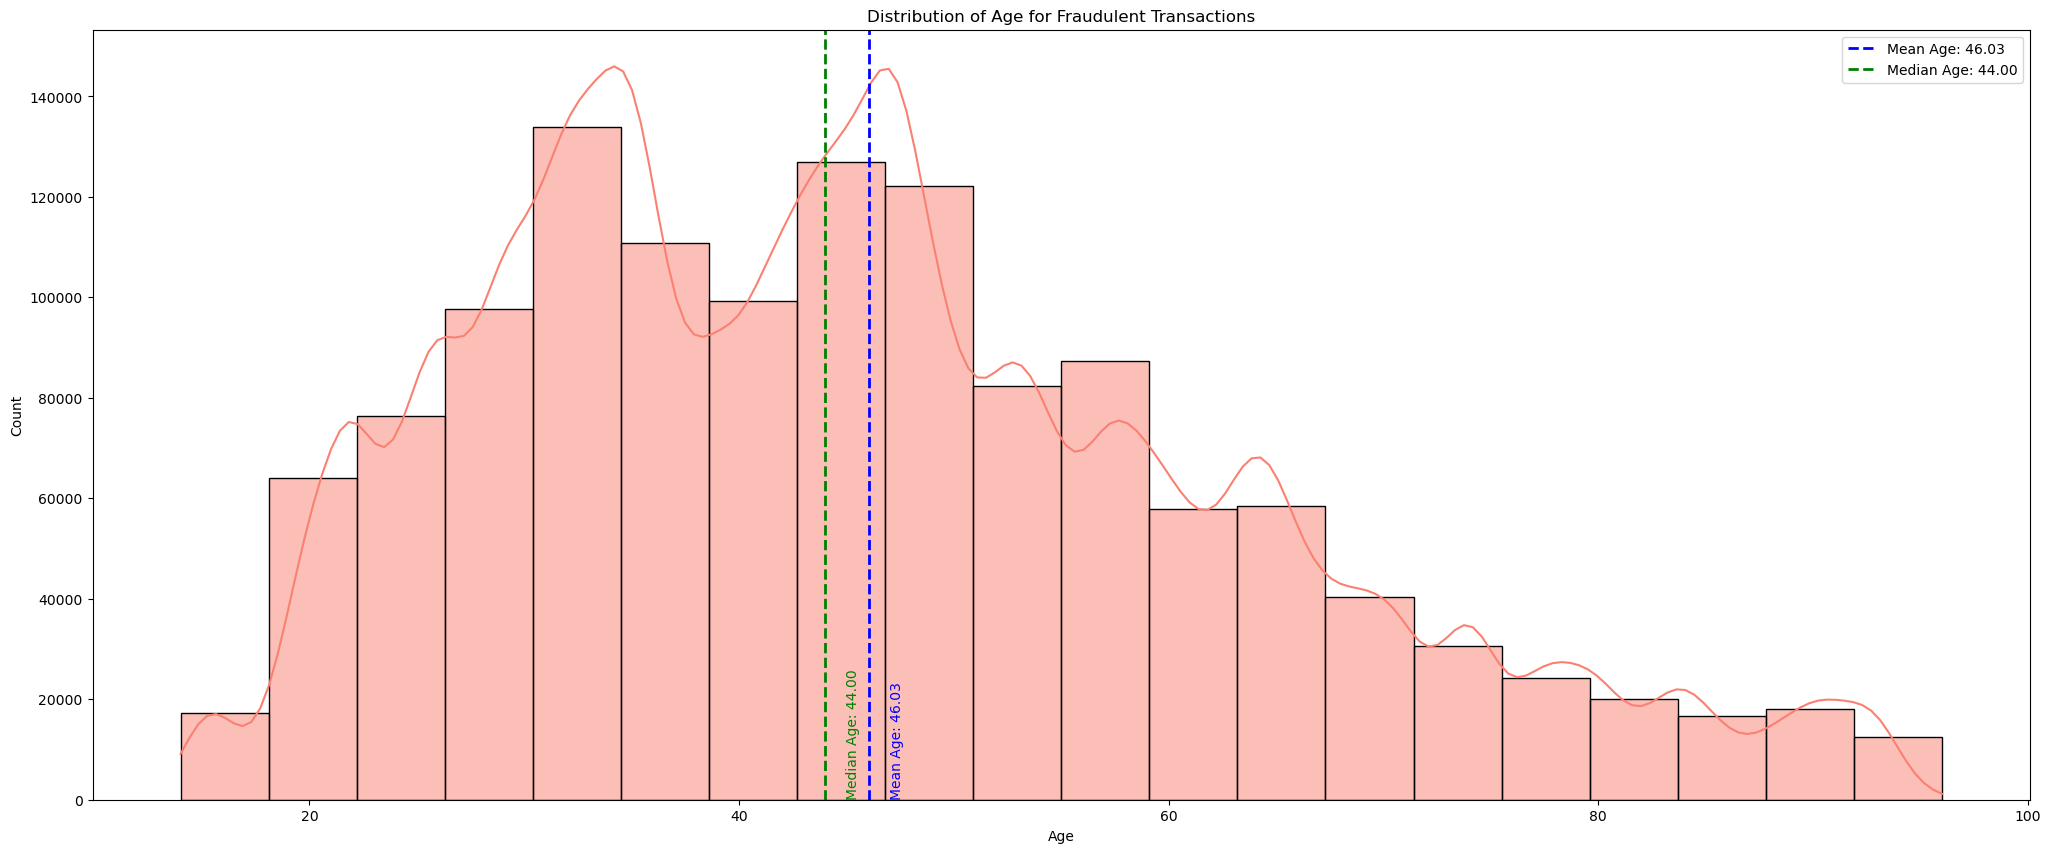

In [44]:
data_fraud = data_train[data_train['is_fraud'] == 1]

mean_age_train = ages_train.mean()

plt.figure(figsize=(25, 10))
sns.histplot(ages_train, bins=20, kde=True, color='salmon', edgecolor='black')

plt.title('Distribution of Age for Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(mean_age_train, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age_train:.2f}')
plt.axvline(median_age_train, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age_train:.2f}')
plt.text(mean_age_train + 1, 50, f'Mean Age: {mean_age_train:.2f}', rotation=90, va='bottom', color='blue')
plt.text(median_age_train + 1, 45, f'Median Age: {median_age_train:.2f}', rotation=90, va='bottom', color='green')
plt.legend()
plt.show()

## FEATURE ENGINEERING

In [45]:
def classify_age(age):
    if age < 21:
        return 'young'
    elif age < 35:
        return 'middle'
    elif age < 55:
        return 'old'
    elif age < 75:
        return 'elderly'
    else:
        return 'oldest'

In [46]:
def classify_hour(hour):
    if hour in [22, 23, 0, 1, 2, 3]:
        return 'night'
    elif hour in [14, 18, 19, 13, 15, 17, 16, 21, 12, 20]:
        return 'afternoon'
    elif hour in [9, 10, 11]:
        return 'morning'
    else:
        return 'daytime'

In [47]:
def classify_distance(distance):
    if distance < 50:
        return 'high'
    elif distance < 110:
        return 'medium'
    elif distance < 300:
        return 'long'
    else:
        return 'very long'

In [48]:
def prepared_feature(data_prepare): 
 data_prepare['trans_date_trans_time'] = pd.to_datetime(data_prepare['trans_date_trans_time'])
 data_prepare['dob'] = pd.to_datetime(data_prepare['dob'])
 data_prepare['time'] = data_prepare['trans_date_trans_time'].dt.time
 data_prepare['date'] = data_prepare['trans_date_trans_time'].dt.date
 data_prepare['year'] = data_prepare['trans_date_trans_time'].dt.year
 data_prepare['month'] = data_prepare['trans_date_trans_time'].dt.month
 data_prepare['day'] = data_prepare['trans_date_trans_time'].dt.day
 data_prepare['dayofweek'] = data_prepare['trans_date_trans_time'].dt.dayofweek
 data_prepare['hour'] = data_prepare['trans_date_trans_time'].dt.hour
 data_prepare['minute'] = data_prepare['trans_date_trans_time'].dt.minute
 data_prepare['second'] = data_prepare['trans_date_trans_time'].dt.second
    
 data_prepare['age'] = calculate_age_train(data_prepare['trans_date_trans_time'], data_prepare['dob'])
 data_prepare['age_group'] = data_prepare['age'].apply(classify_age)
    
 data_prepare['distance'] = data_prepare.apply(lambda x: haversine_distance((x['merch_lat'], x['merch_long']), (x['lat'], x['long'])), axis=1)
 data_prepare['distance_category'] = data_prepare['distance'].apply(classify_distance)
    
 data_prepare['hour_risk_category'] = data_prepare['hour'].apply(classify_hour)
    
 data_prepare['cc_order_index'] = data_prepare.groupby(['cc_num', 'day']).cumcount() + 1
 data_prepare['category_fraud_rate'] = data_prepare.groupby('category')['is_fraud'].transform('mean')
 data_prepare['cc_fraud_rate'] = data_prepare.groupby('cc_num')['is_fraud'].transform('mean')
 data_prepare['job_fraud_rate'] = data_prepare.groupby('job')['is_fraud'].transform('mean')
    
 data_prepare = pd.get_dummies(data_prepare, columns=['hour_risk_category', 'distance_category', 'age_group'], dtype=int)
    
 return data_prepare

prepared_data = prepared_feature(data_train)

In [49]:
prepared_data = prepared_data.drop(columns=[
    'gender',
    'trans_date_trans_time',
    'city',
    'city_pop',
    'amt',
    'dob',
    'lat',
    'long',
    'merch_lat',
    'merch_long',
    'category',
    'job',
    'cc_num',
    'category_time',
    'date',
    'year',
    'month',
    'day',
    'time',
    'second',
    'minute',
    'day_of_week',
    'Fraud_Level_Category',
])

In [50]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   is_fraud                      1296675 non-null  int64  
 1   hour                          1296675 non-null  int32  
 2   risk_category_by_category     1296675 non-null  int64  
 3   distance                      1296675 non-null  float64
 4   dayofweek                     1296675 non-null  int32  
 5   age                           1296675 non-null  int32  
 6   cc_order_index                1296675 non-null  int64  
 7   category_fraud_rate           1296675 non-null  float64
 8   cc_fraud_rate                 1296675 non-null  float64
 9   job_fraud_rate                1296675 non-null  float64
 10  hour_risk_category_afternoon  1296675 non-null  int32  
 11  hour_risk_category_daytime    1296675 non-null  int32  
 12  hour_risk_category_morning  

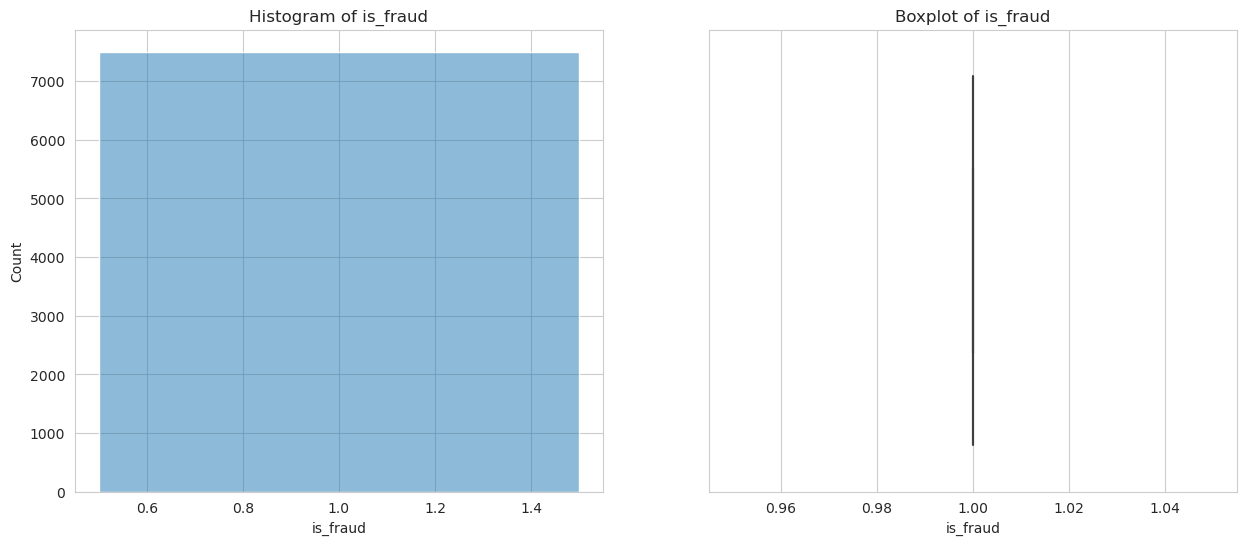

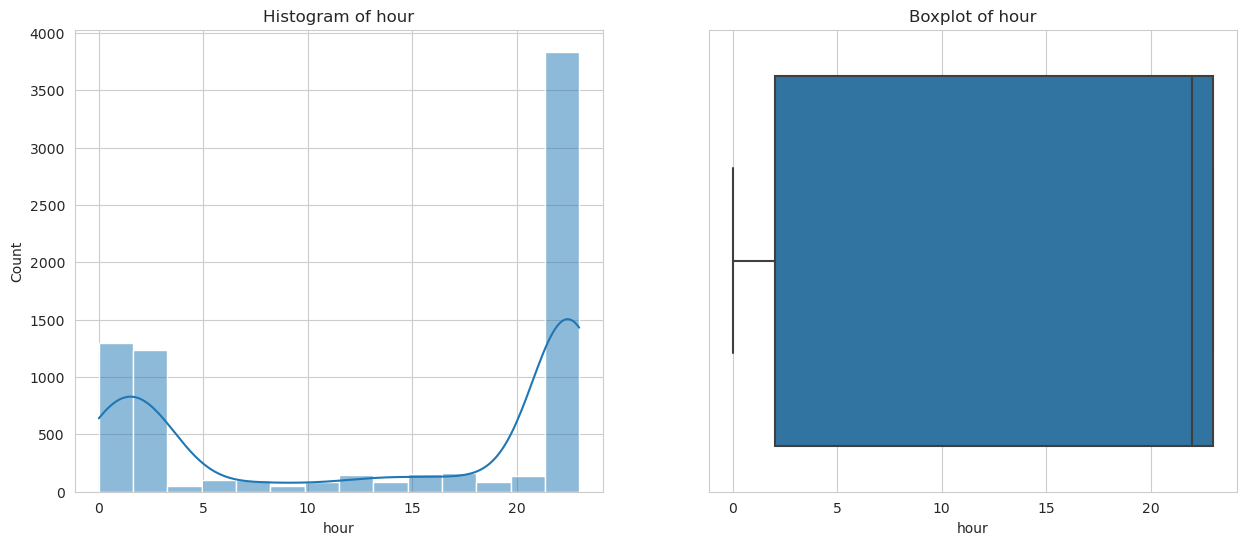

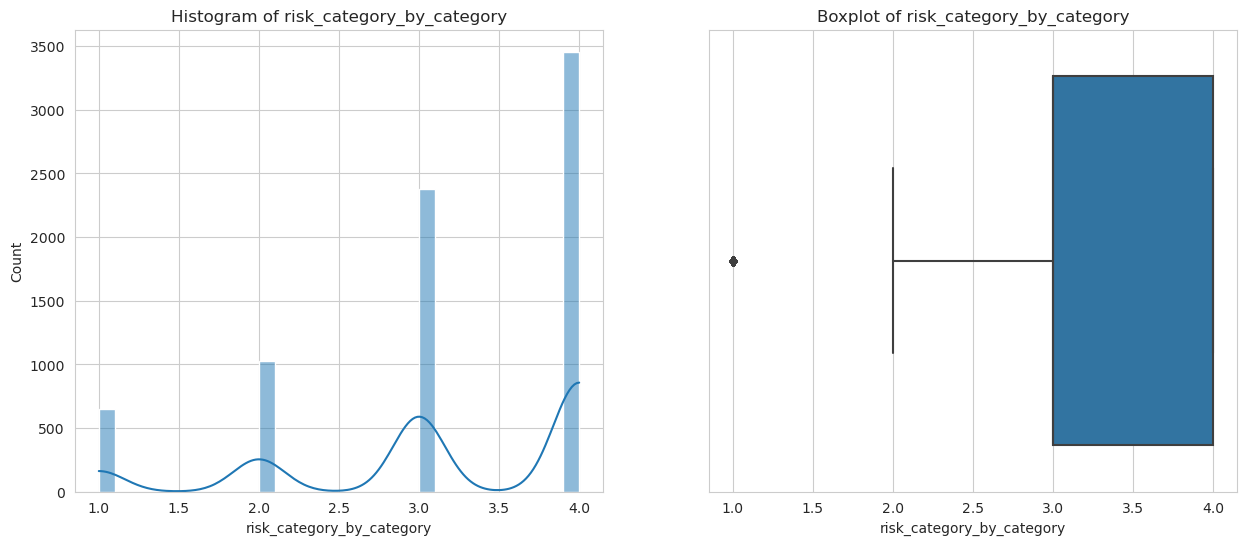

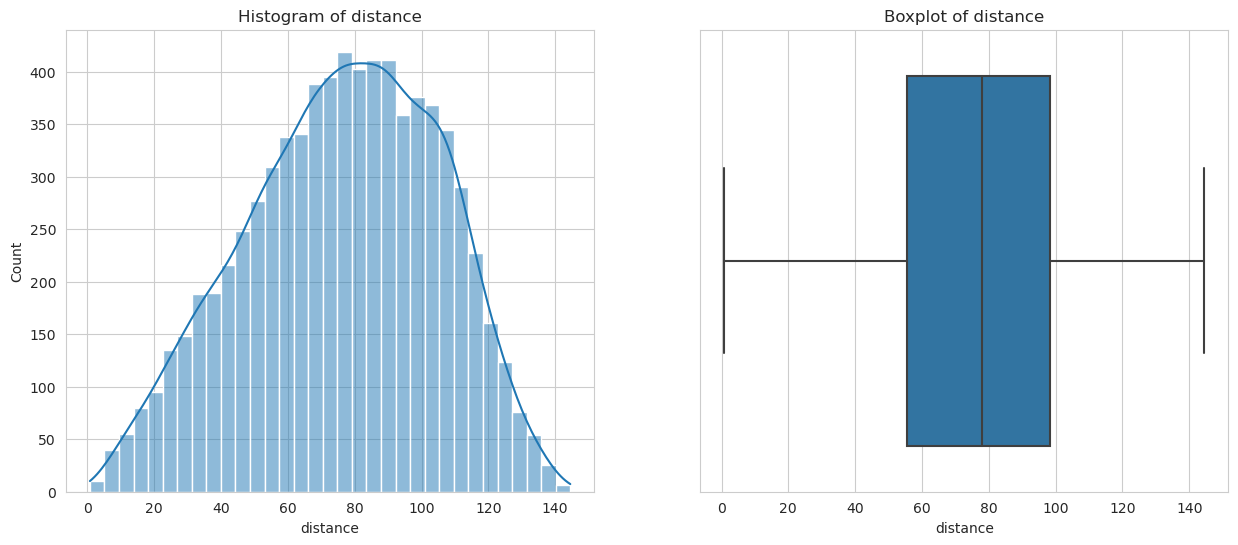

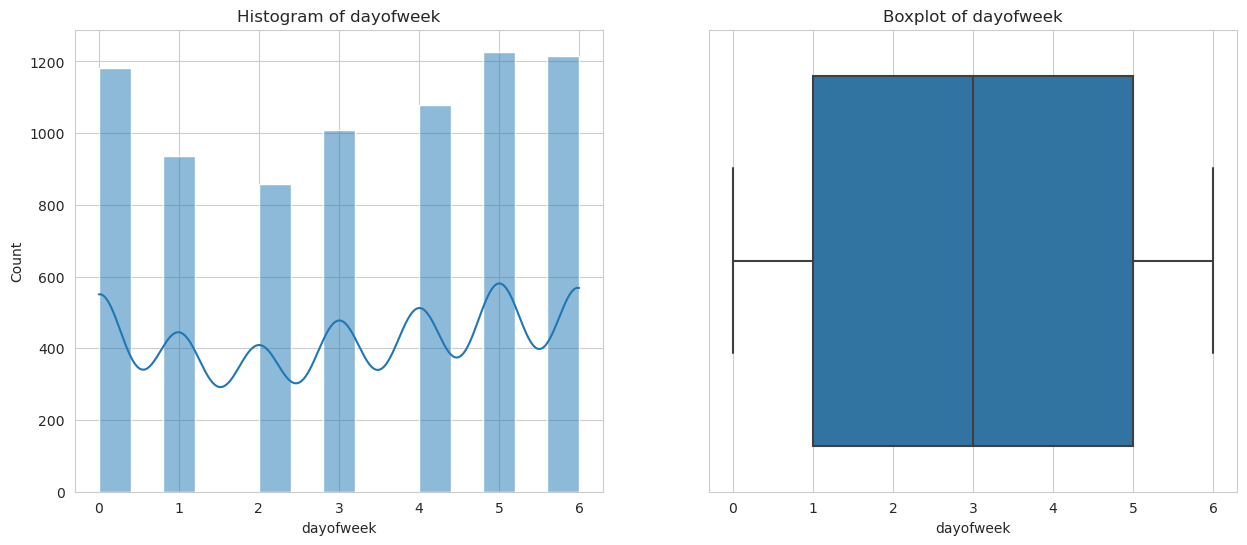

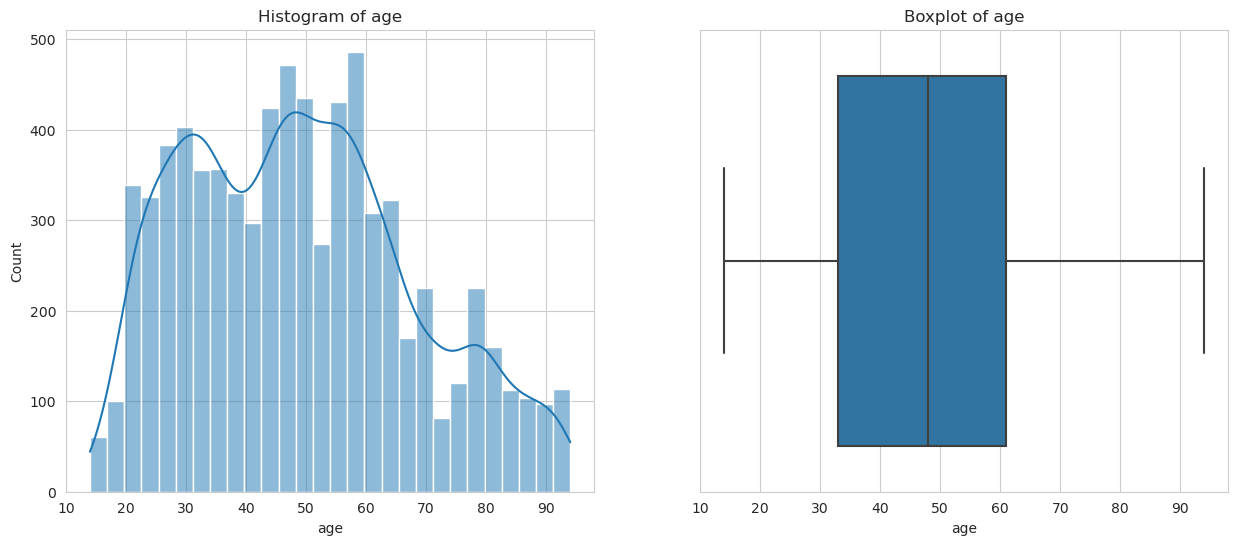

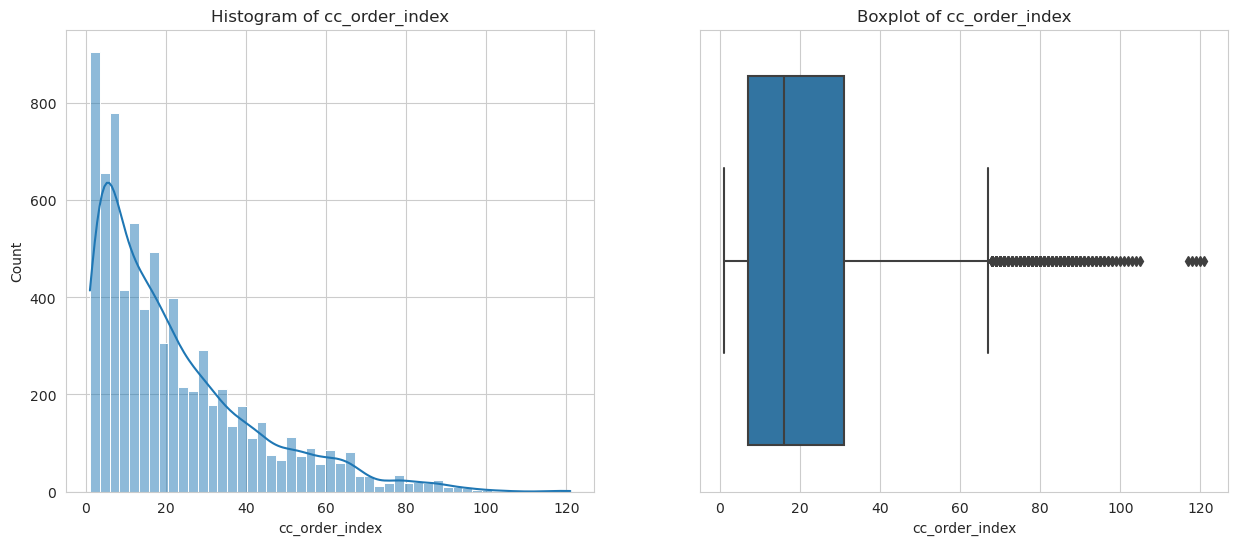

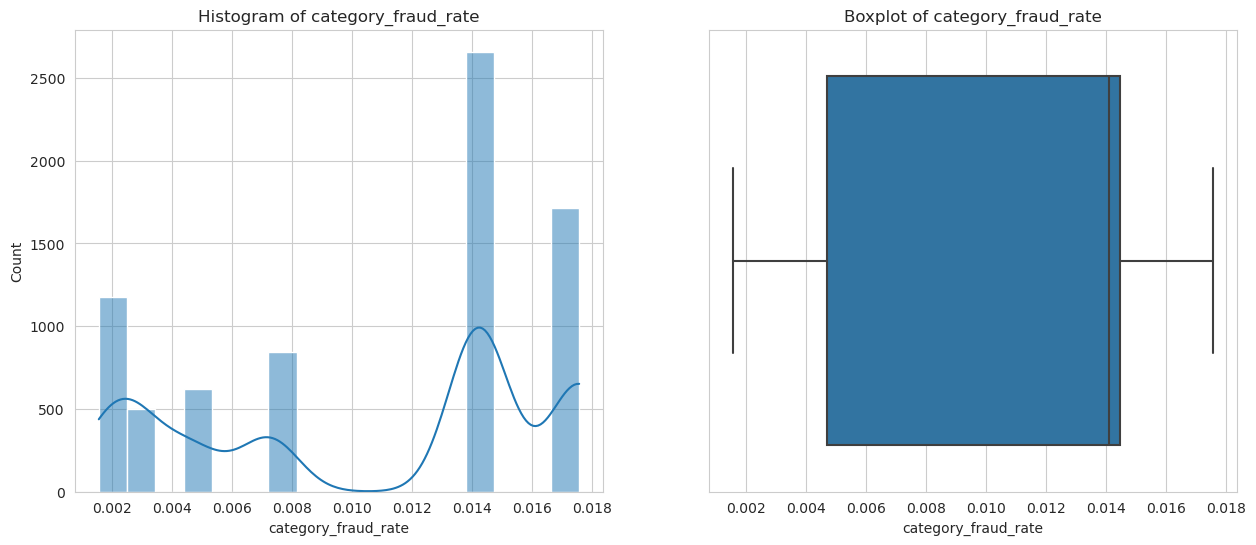

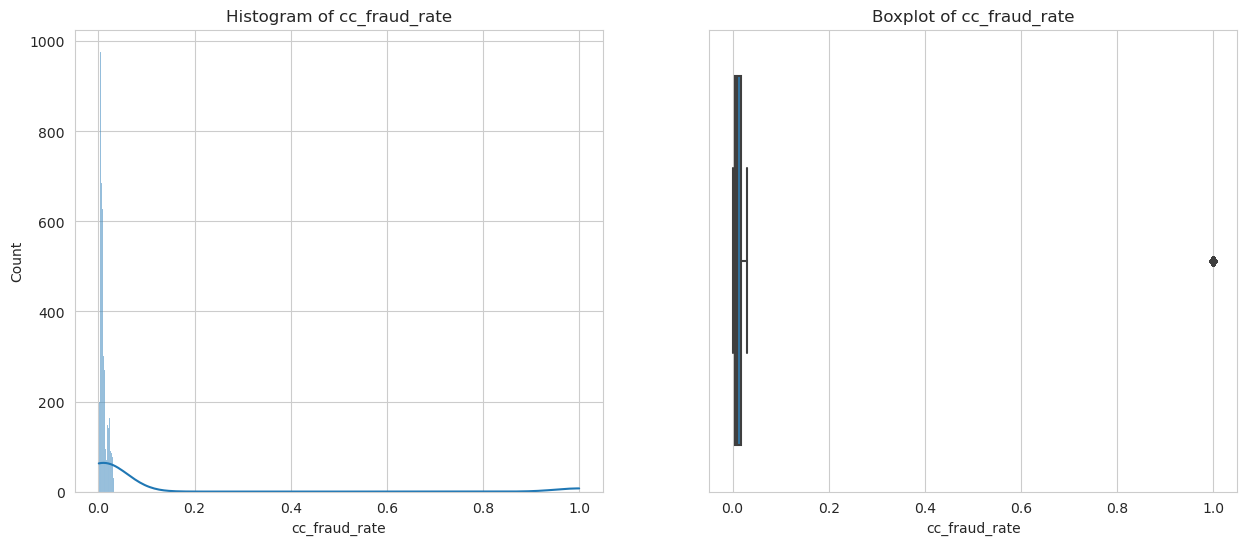

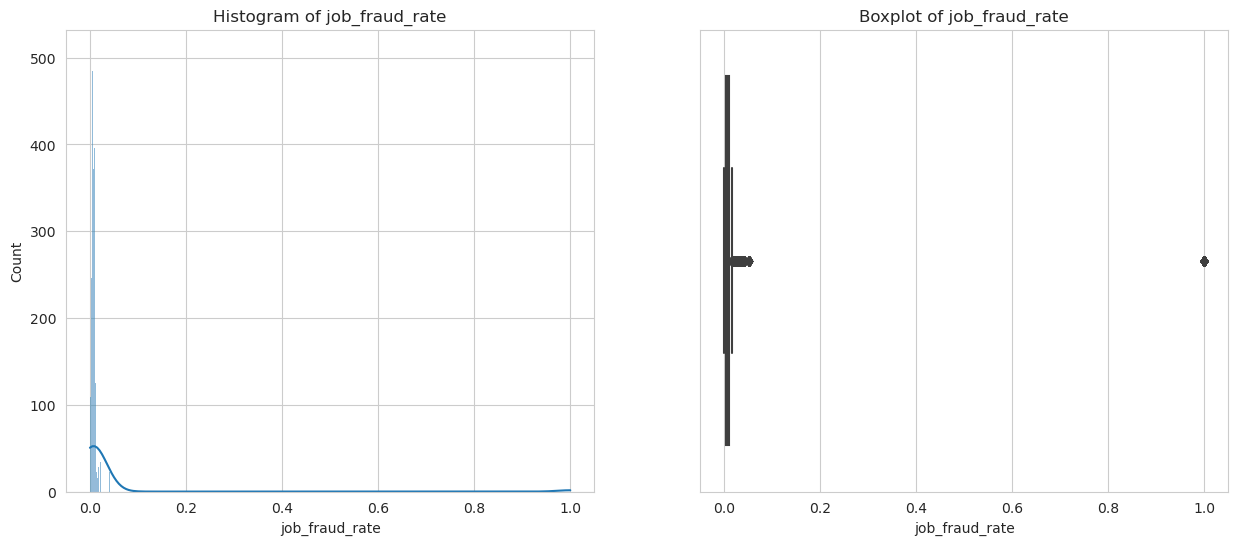

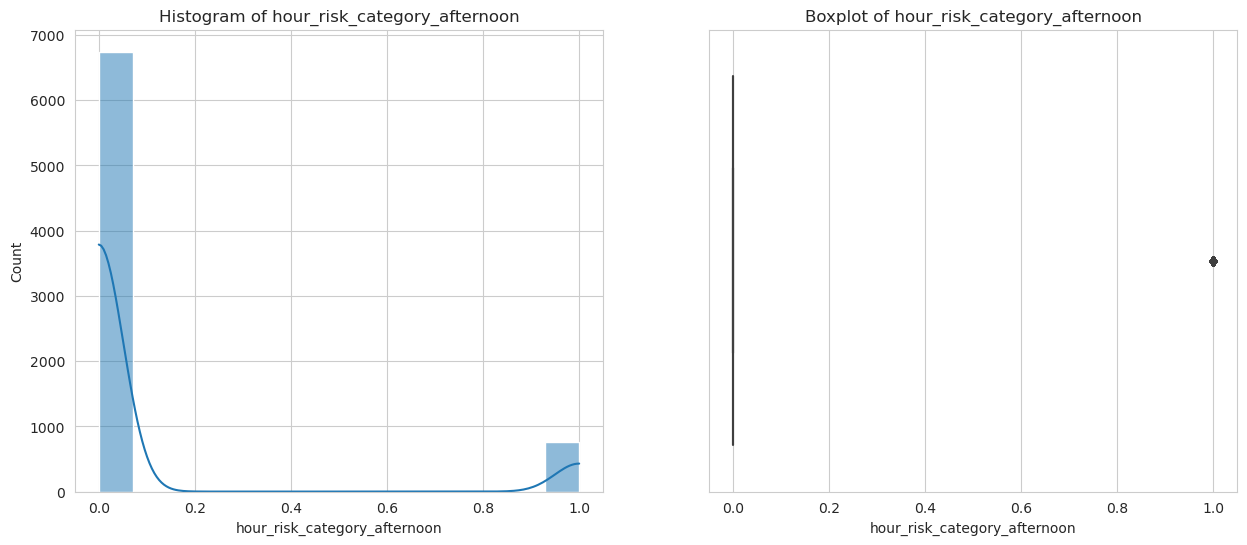

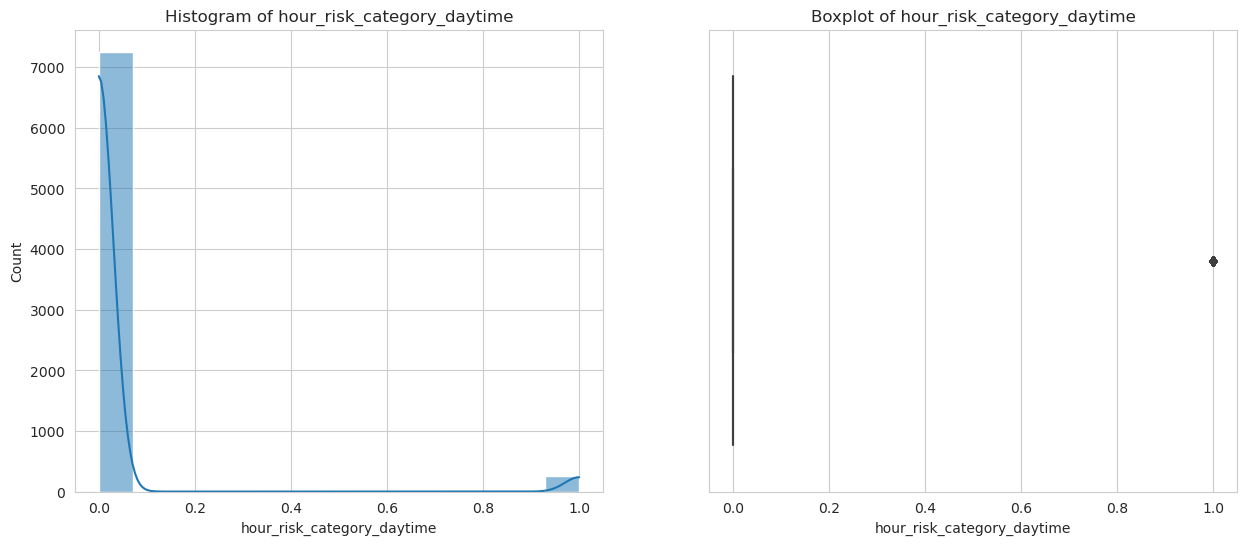

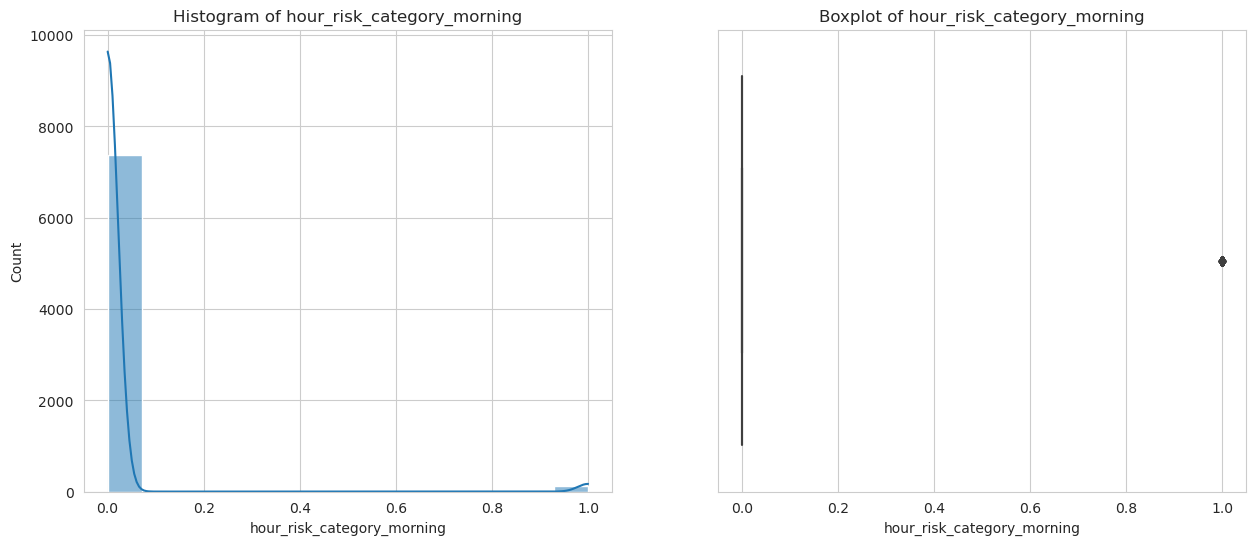

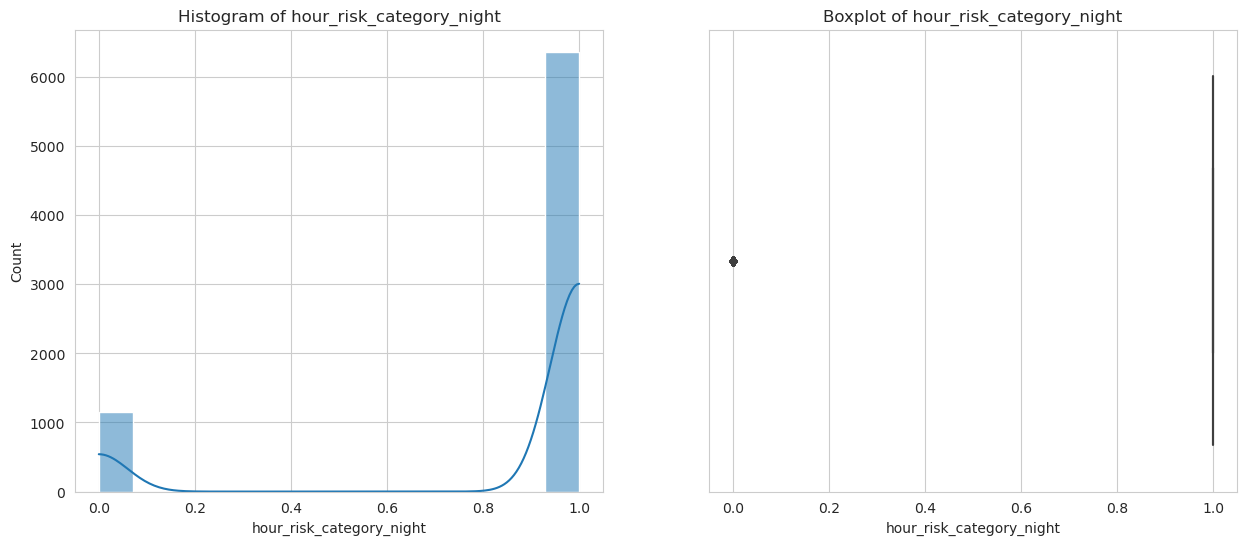

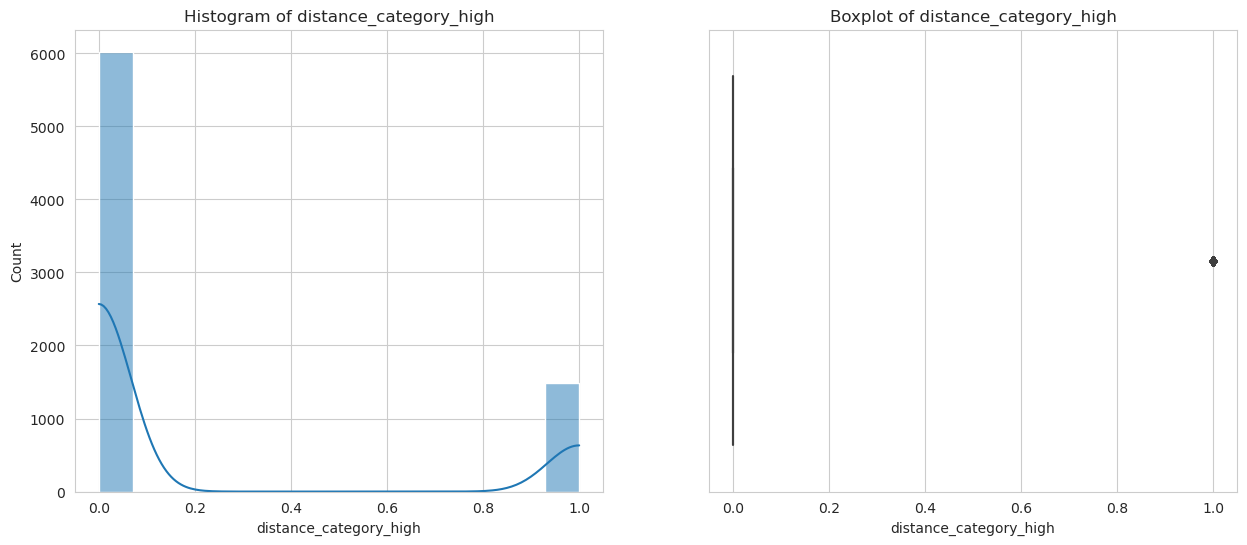

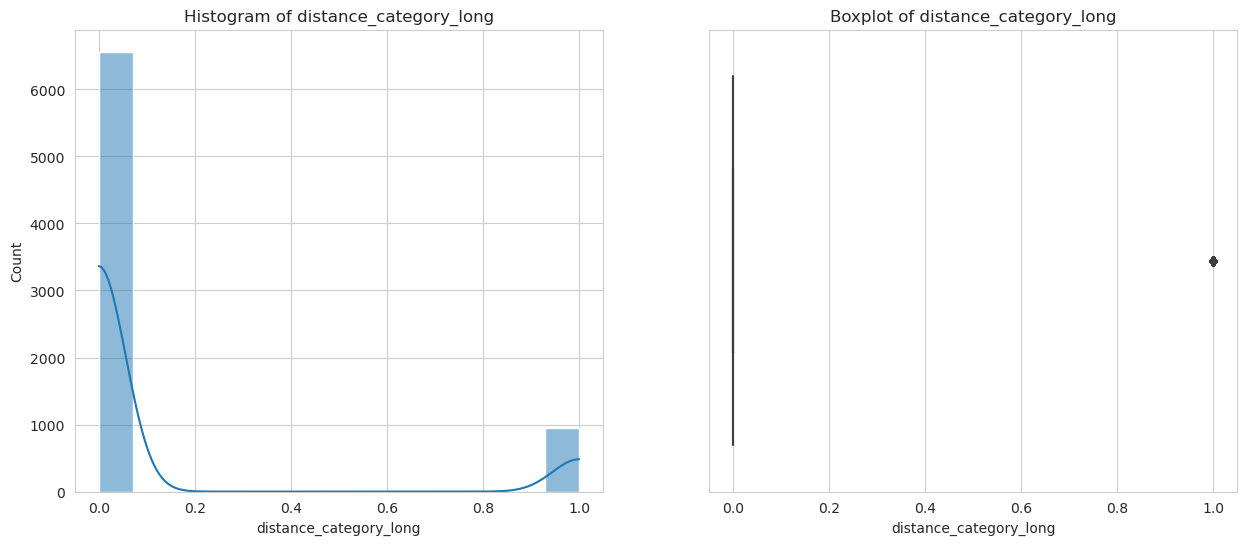

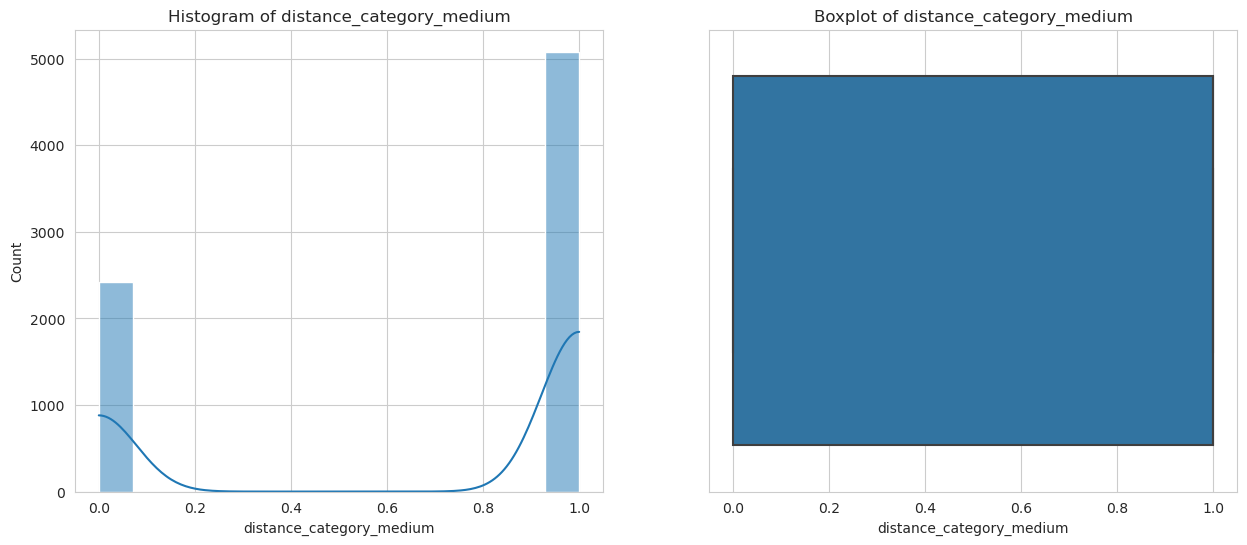

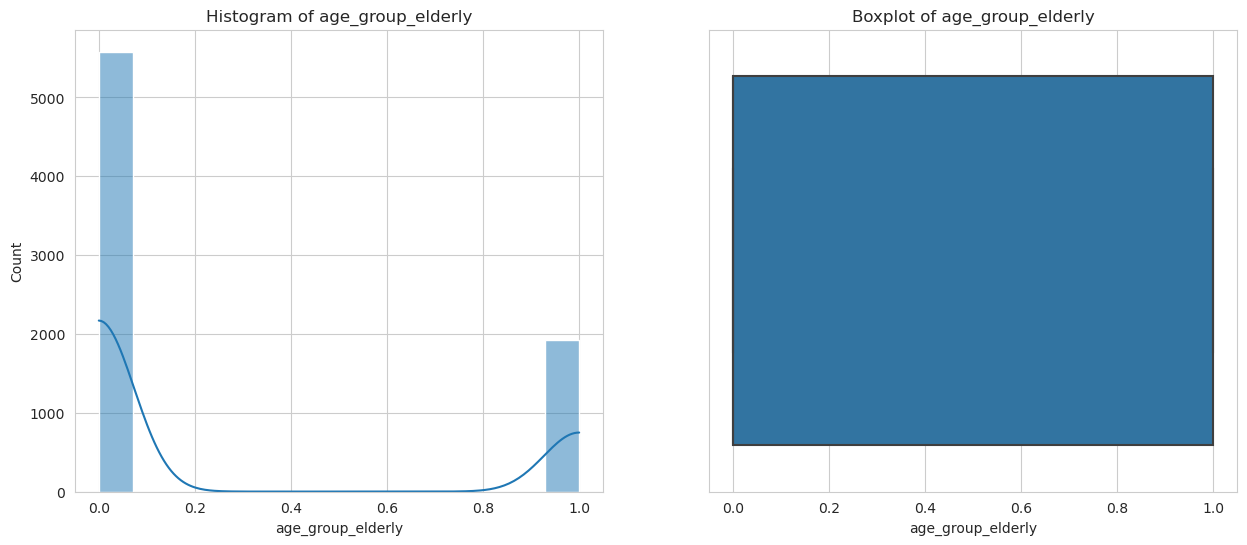

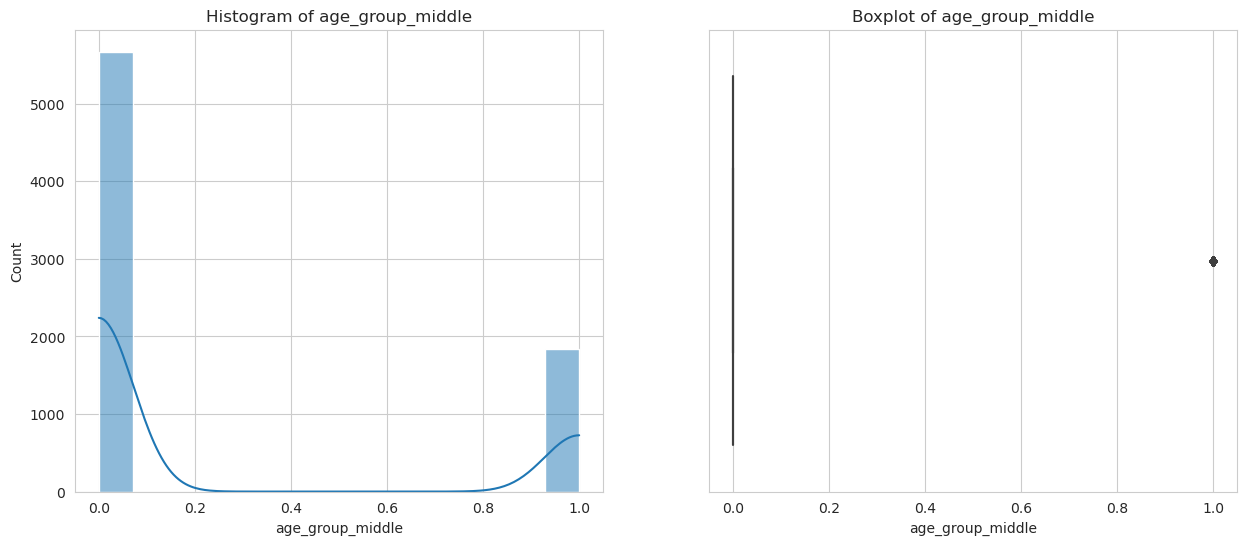

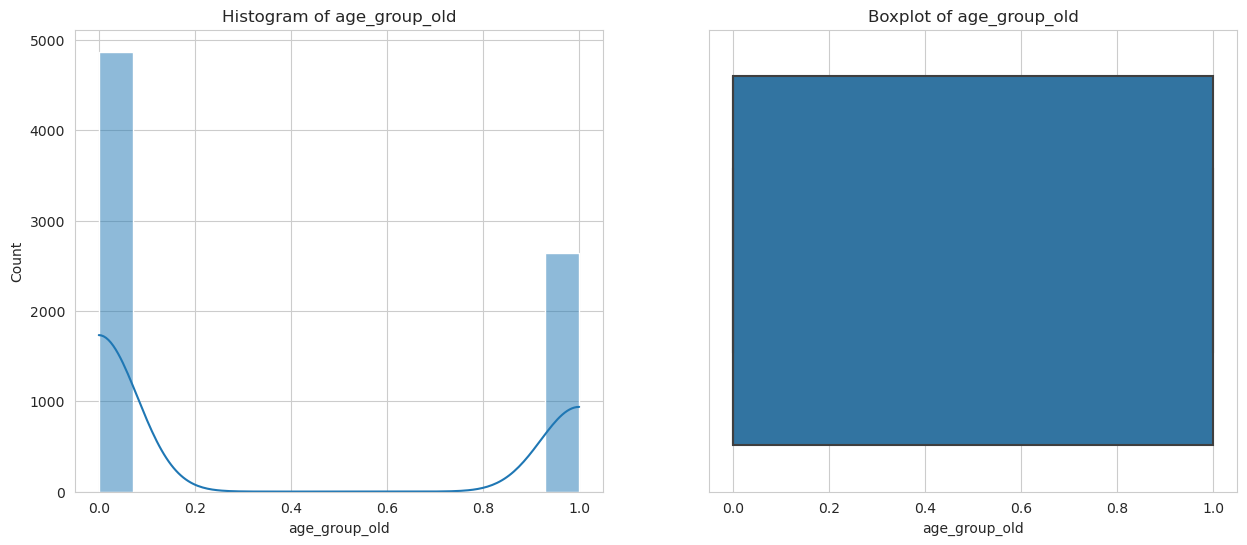

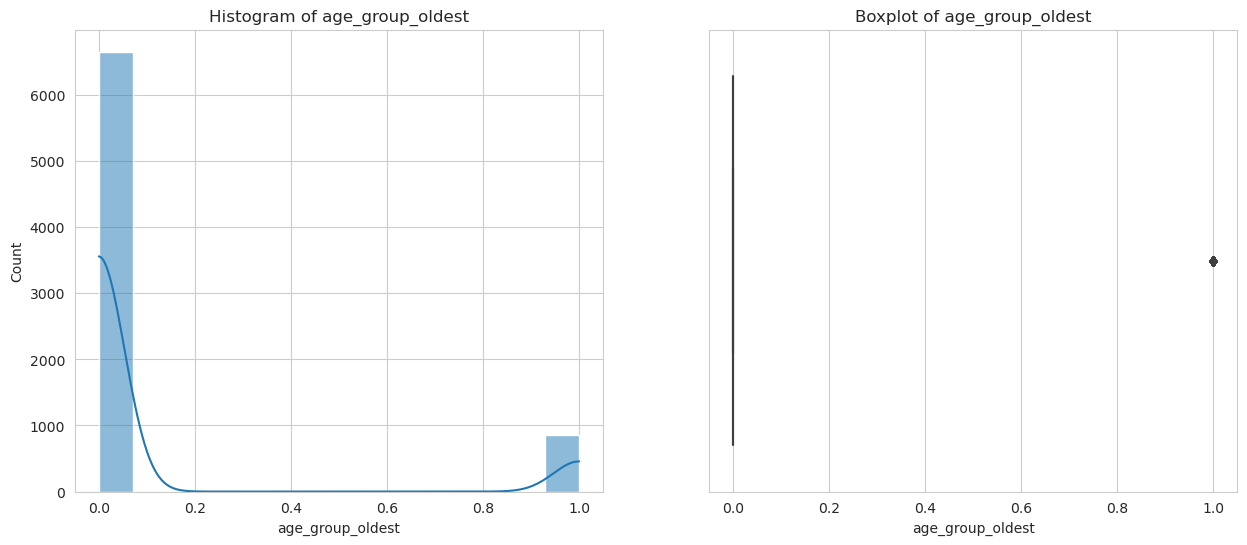

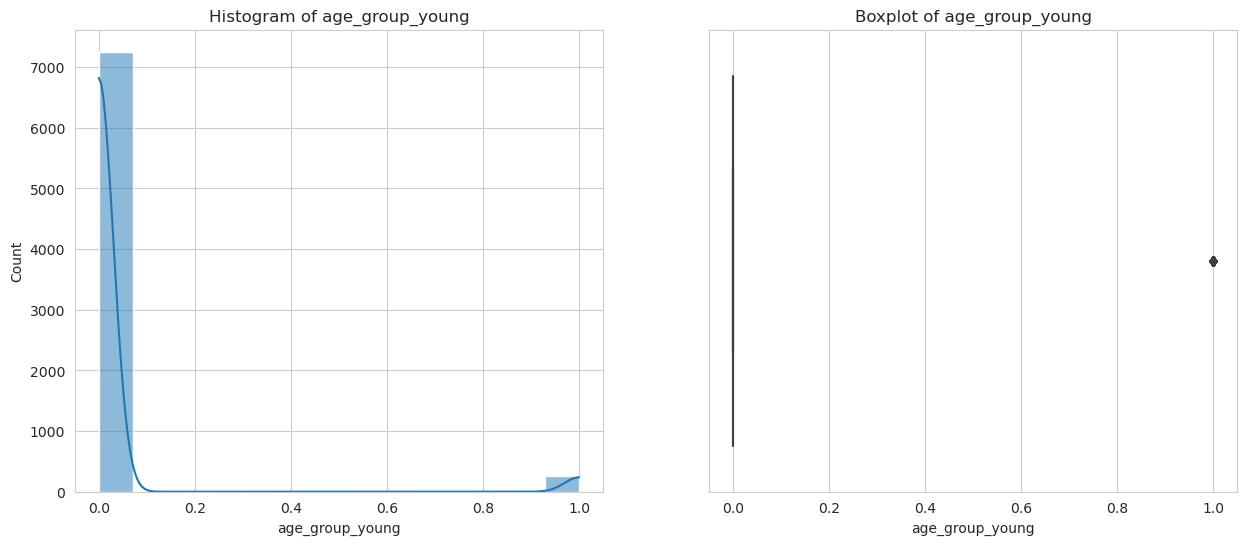

In [51]:
fraud_data = prepared_data[prepared_data['is_fraud'] == 1]

for col in fraud_data.columns:
    with sns.axes_style('whitegrid'):
     fig, ax = plt.subplots(1, 2, figsize=(15, 6))
     sns.histplot(fraud_data, x=col, kde=True, ax=ax[0])
     ax[0].set_title(f'Histogram of {col}')
     sns.boxplot(fraud_data, x=col, ax=ax[1])
     ax[1].set_title(f'Boxplot of {col}')
    plt.show()

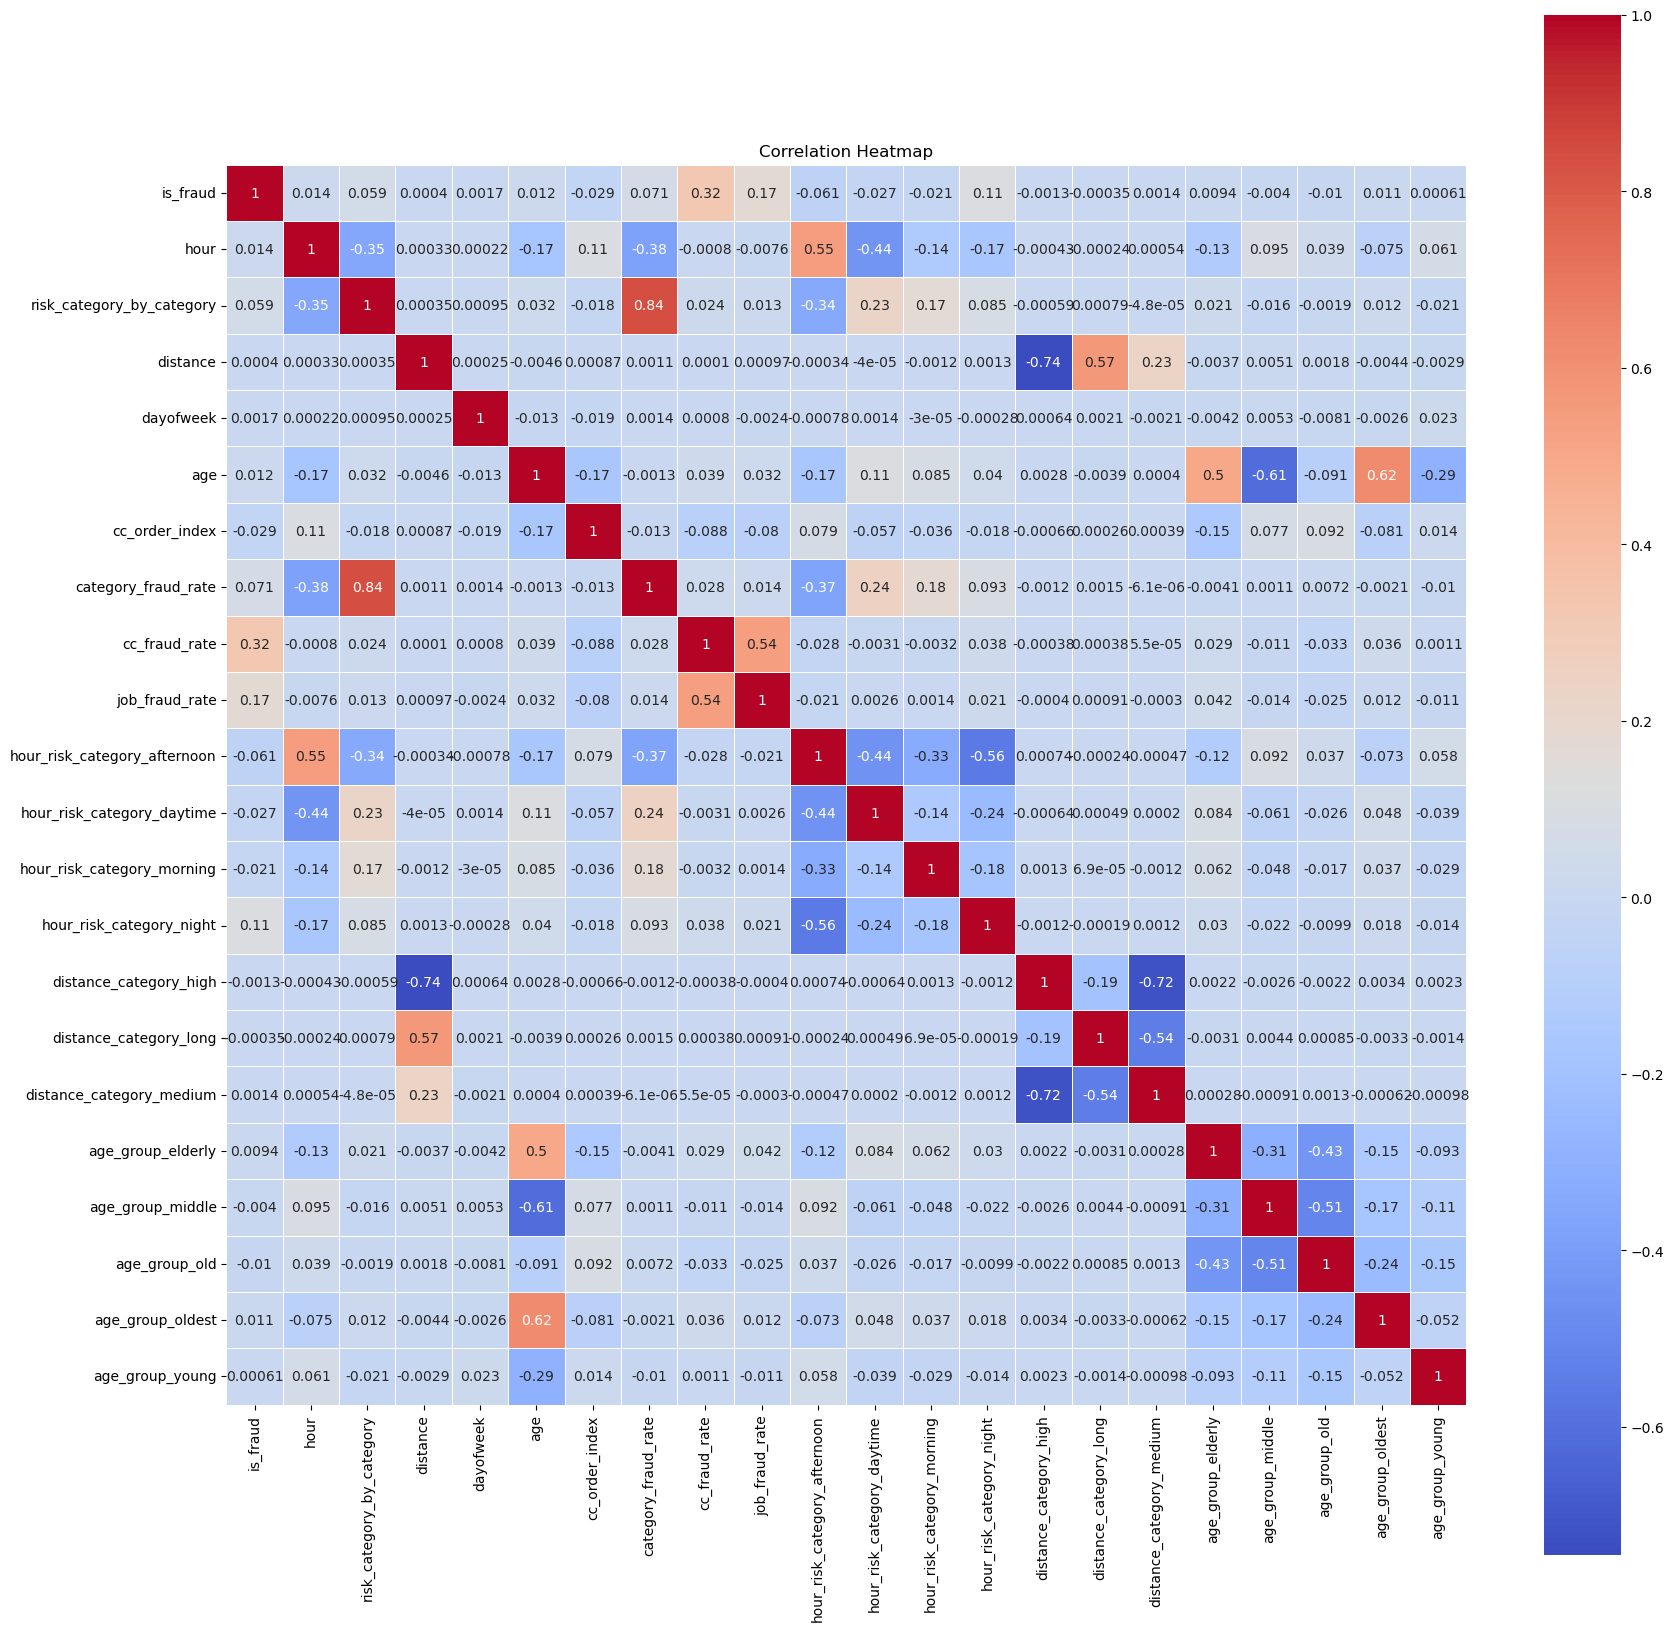

In [52]:
corr = prepared_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# SPLIT DATA

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x  = prepared_data.drop(columns=['is_fraud'], axis=1)
y  = prepared_data['is_fraud']

In [55]:
x

,hour,risk_category_by_category,distance,dayofweek,age,cc_order_index,category_fraud_rate,cc_fraud_rate,job_fraud_rate,hour_risk_category_afternoon,...,hour_risk_category_morning,hour_risk_category_night,distance_category_high,distance_category_long,distance_category_medium,age_group_elderly,age_group_middle,age_group_old,age_group_oldest,age_group_young
0,0,3,78.597568,1,31,1,0.014458,0.000000,0.001693,0,...,0,1,0,0,1,0,1,0,0,0
1,0,4,30.212176,1,41,1,0.014098,0.000000,0.002157,0,...,0,1,1,0,0,0,0,1,0,0
2,0,2,108.206083,1,57,1,0.002478,0.000000,0.015656,0,...,0,1,0,0,1,1,0,0,0,0
3,0,3,95.673231,1,52,1,0.004694,0.030426,0.007905,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,77.556744,1,33,1,0.003139,0.000000,0.000000,0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,12,2,119.752136,6,59,62,0.002478,0.005948,0.005338,1,...,0,0,0,1,0,1,0,0,0,0
1296671,12,1,75.104085,6,41,14,0.001651,0.015066,0.015066,1,...,0,0,0,0,1,0,0,1,0,0
1296672,12,1,99.047734,6,53,69,0.001651,0.005314,0.006103,1,...,0,0,0,0,1,0,0,1,0,0
1296673,12,1,84.627652,6,40,54,0.001651,0.003953,0.003953,1,...,0,0,0,0,1,0,0,1,0,0


In [56]:
from mlxtend.preprocessing import minmax_scaling
scaled_features = minmax_scaling(x, columns=x.columns)

from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_features = robust_scaler.fit_transform(scaled_features)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(x)

# HANDLING IMBALANCED DATA

In [57]:
def compute_class_weights(y):
    classes = np.unique(y)
    class_counts = np.bincount(y)
    class_weights = np.zeros(len(classes), dtype=float)
    
    total_samples = np.sum(class_counts)
    
    for cls in classes:
        class_weight = total_samples / (len(classes) * class_counts[cls])
        class_weights[cls] = class_weight
    
    return class_weights

class_weights_final = compute_class_weights(y)

In [58]:
class_weights_final

array([ 0.50291118, 86.37589928])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, y, test_size = 0.2, random_state = 42)

# MODELING (Logistic Regression, Random Forest, XGBoost) and EVALUATE

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from keras import backend as K
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

from sklearn.metrics import precision_score, recall_score, f1_score

In [61]:
def model_logistic_regression(x_train, y_train):
    model = LogisticRegression(solver='liblinear', penalty='l1', C=0.01)
    model.fit(x_train, y_train)
    return model

In [62]:
def model_random_forest(x_train, y_train):
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(x_train, y_train)
  return model

In [63]:
def model_xgboost(x_train, y_train, params=None):
  if params is None:
        params = {
            'objective': 'binary:logistic', #for biner classification biner
            'eval_metric': 'logloss'  # evaluation metric for data_train
        }

  model = XGBClassifier(**params)
  model.fit(x_train, y_train)

  return model

In [64]:
def set_random_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

random_seed = 42
set_random_seed(random_seed)

# Recall
def calculate_recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Precision
def calculate_precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# F1-score
def calculate_f1(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

In [65]:
def maximum_metric(history):
 max_precision_train = max(history.history['precision_m'])
 max_recall_train = max(history.history['recall_m'])
 max_f1_train = max(history.history['f1_m'])
 max_val_precision_test = max(history.history['val_precision_m'])
 max_val_recall_test = max(history.history['val_recall_m'])
 max_val_f1_test = max(history.history['val_f1_m'])
 
 print('Max Metrics for Training:')
 print('max_precision_train -', max_precision_train)
 print('max_recall_train -', max_recall_train)
 print('max_f1_train -', max_f1_train)

 print('\nMax Metrics for Validation:')
 print('max_val_precision_test -', max_val_precision_test)
 print('max_val_recall_test -', max_val_recall_test)
 print('max_val_f1_test -', max_val_f1_test)

In [66]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    

    print('Classification Report for Training Set:')
    print(classification_report(y_train, y_train_pred))
    
    confusion_mtx_train = confusion_matrix(y_train, y_train_pred)
    
    f, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(confusion_mtx_train, annot=True, linewidths=0.01, cmap="pink", linecolor="black", fmt='.1f', ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - Training Set")
    plt.show()
    
    y_test_pred = model.predict(x_test)
    
    print('Classification Report for Test Set:')
    print(classification_report(y_test, y_test_pred))
    
    confusion_mtx_test = confusion_matrix(y_test, y_test_pred)
    
    f, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(confusion_mtx_test, annot=True, linewidths=0.01, cmap="pink", linecolor="black", fmt='.1f', ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix - Test Set")
    plt.show()

    return {
        'classification_report_train': classification_report(y_train, y_train_pred, output_dict=True),
        'confusion_matrix_train': confusion_mtx_train,
        'classification_report_test': classification_report(y_test, y_test_pred, output_dict=True),
        'confusion_matrix_test': confusion_mtx_test
    }

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1031354
           1       0.94      0.11      0.19      5986

    accuracy                           0.99   1037340
   macro avg       0.97      0.55      0.59   1037340
weighted avg       0.99      0.99      0.99   1037340



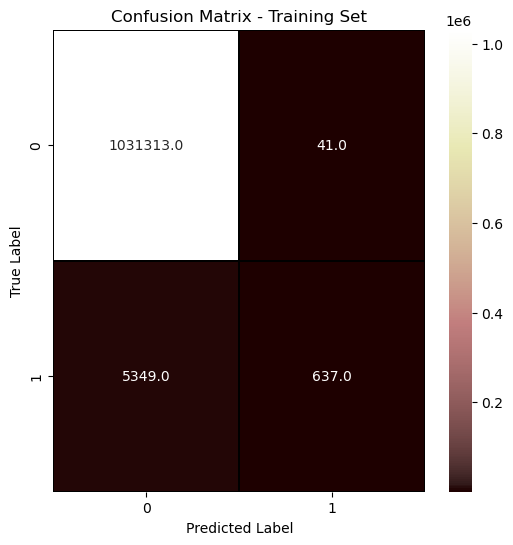

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.94      0.10      0.19      1520

    accuracy                           0.99    259335
   macro avg       0.97      0.55      0.59    259335
weighted avg       0.99      0.99      0.99    259335



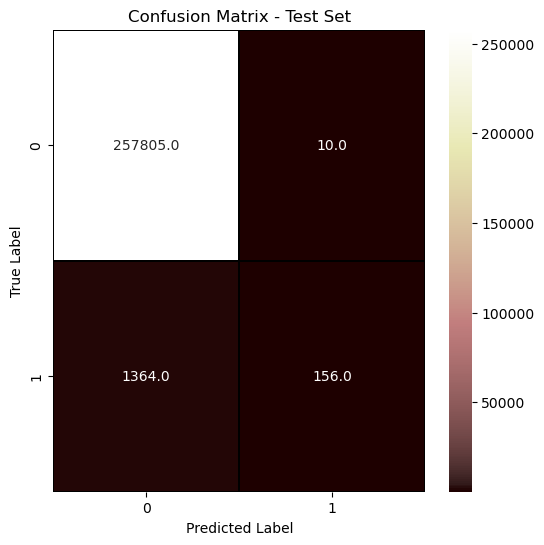


Classification Report (Training Set):
{'0': {'precision': 0.9948401696985131, 'recall': 0.9999602464333294, 'f1-score': 0.9973936371865595, 'support': 1031354.0}, '1': {'precision': 0.93952802359882, 'recall': 0.10641496825927163, 'f1-score': 0.19117647058823528, 'support': 5986.0}, 'accuracy': 0.9948040179690362, 'macro avg': {'precision': 0.9671840966486666, 'recall': 0.5531876073463005, 'f1-score': 0.5942850538873974, 'support': 1037340.0}, 'weighted avg': {'precision': 0.9945209893848717, 'recall': 0.9948040179690362, 'f1-score': 0.992741338076087, 'support': 1037340.0}}

Confusion Matrix (Training Set):
[[1031313      41]
 [   5349     637]]

Classification Report (Test Set):
{'0': {'precision': 0.9947370248756603, 'recall': 0.9999612124973334, 'f1-score': 0.9973422775172927, 'support': 257815.0}, '1': {'precision': 0.9397590361445783, 'recall': 0.10263157894736842, 'f1-score': 0.18505338078291814, 'support': 1520.0}, 'accuracy': 0.9947018335357742, 'macro avg': {'precision': 0.9

In [67]:
try_model_logistic = model_logistic_regression(x_train, y_train)
evaluation_results = evaluate_model(try_model_logistic, x_train, y_train, x_test, y_test)
    
print("\nClassification Report (Training Set):")
print(evaluation_results['classification_report_train'])
    
print("\nConfusion Matrix (Training Set):")
print(evaluation_results['confusion_matrix_train'])
    
print("\nClassification Report (Test Set):")
print(evaluation_results['classification_report_test'])
    
print("\nConfusion Matrix (Test Set):")
print(evaluation_results['confusion_matrix_test'])

Training Set:
- Precision for Class 1: Approximately 0.94, indicating that out of all instances predicted as Class 1, only about 94% are actually correct (true positive).

- Recall for Class 1: Around 0.11, meaning that out of all actual instances that are Class 1, only about 11% are correctly predicted (true positive rate).

- F1-score for Class 1: Approximately 0.19, indicating a low balance between precision and recall

Confusion Matrix Analysis:
- Training Set:
High number of false negatives (5349), indicating the model fails to identify many instances that are actually Class 1.
Significant number of false positives (41), though not as high as false negatives.
- Test Set:
Similar results to the training set with low precision, recall, and F1-score for Class 1.

Conclusion:
From the model evaluation results, it appears that the logistic regression model struggles to classify the minority class (Class 1). This is evidenced by the low recall for Class 1, indicating that the model tends to miss many instances that are actually Class 1 (false negatives).

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031354
           1       1.00      1.00      1.00      5986

    accuracy                           1.00   1037340
   macro avg       1.00      1.00      1.00   1037340
weighted avg       1.00      1.00      1.00   1037340



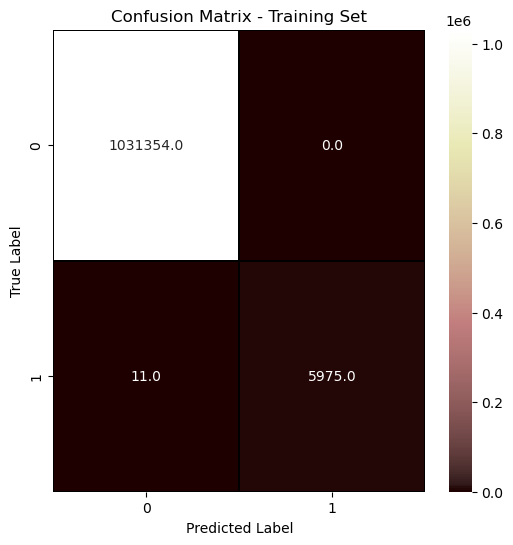

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.98      0.36      0.53      1520

    accuracy                           1.00    259335
   macro avg       0.99      0.68      0.76    259335
weighted avg       1.00      1.00      1.00    259335



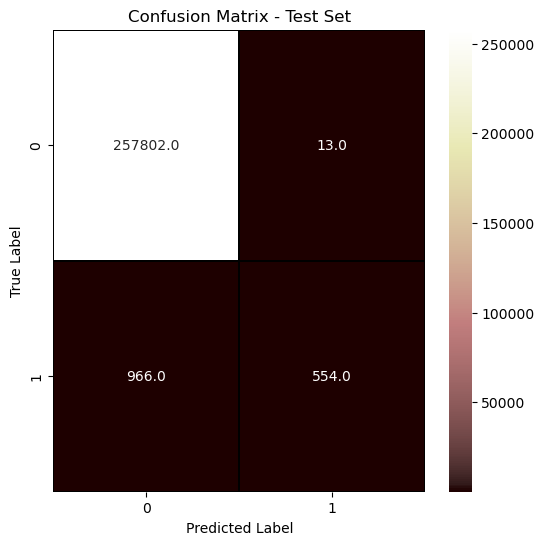


Classification Report (Training Set):
{'0': {'precision': 0.9999893345226957, 'recall': 1.0, 'f1-score': 0.9999946672329095, 'support': 1031354.0}, '1': {'precision': 1.0, 'recall': 0.9981623788840628, 'f1-score': 0.9990803444528049, 'support': 5986.0}, 'accuracy': 0.9999893959550389, 'macro avg': {'precision': 0.9999946672613478, 'recall': 0.9990811894420314, 'f1-score': 0.9995375058428573, 'support': 1037340.0}, 'weighted avg': {'precision': 0.999989396068136, 'recall': 0.9999893959550389, 'f1-score': 0.9999893911072789, 'support': 1037340.0}}

Confusion Matrix (Training Set):
[[1031354       0]
 [     11    5975]]

Classification Report (Test Set):
{'0': {'precision': 0.996266926358746, 'recall': 0.9999495762465334, 'f1-score': 0.9981048543990027, 'support': 257815.0}, '1': {'precision': 0.9770723104056437, 'recall': 0.36447368421052634, 'f1-score': 0.5309056061332056, 'support': 1520.0}, 'accuracy': 0.9962249599938304, 'macro avg': {'precision': 0.9866696183821948, 'recall': 0.682

In [68]:
try_model_randomforest = model_random_forest(x_train, y_train)

evaluation_results = evaluate_model(try_model_randomforest, x_train, y_train, x_test, y_test)

print("\nClassification Report (Training Set):")
print(evaluation_results['classification_report_train'])
    
print("\nConfusion Matrix (Training Set):")
print(evaluation_results['confusion_matrix_train'])
    
print("\nClassification Report (Test Set):")
print(evaluation_results['classification_report_test'])
    
print("\nConfusion Matrix (Test Set):")
print(evaluation_results['confusion_matrix_test'])

From these results, it is evident that the Random Forest model performs exceptionally well for the majority class (class 0) in both the training and test sets, achieving precision, recall, and f1-score around 1.00. However, for the minority class (class 1), its performance is notably lower:

- Recall for Class 1 in the Test Data: 0.36, indicating that the model tends to miss a significant number of instances that actually belong to class 1 (false negatives). 

This highlights a potential issue where the model's ability to correctly identify instances of the minority class is less effective compared to the majority class.

Training Set: The model shows excellent performance for the majority class (class 0), with precision, recall, and f1-score all at or near 1.00. However, for the minority class (class 1), the recall is significantly lower at 0.39, indicating that the model misses a substantial number of true positive instances.
Test Set: Similar to the training set, the model performs very well for class 0 but exhibits lower recall (0.37) and f1-score (0.53) for class 1, which suggests it struggles with correctly identifying instances of the minority class.

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031354
           1       0.99      0.39      0.55      5986

    accuracy                           1.00   1037340
   macro avg       0.99      0.69      0.78   1037340
weighted avg       1.00      1.00      1.00   1037340



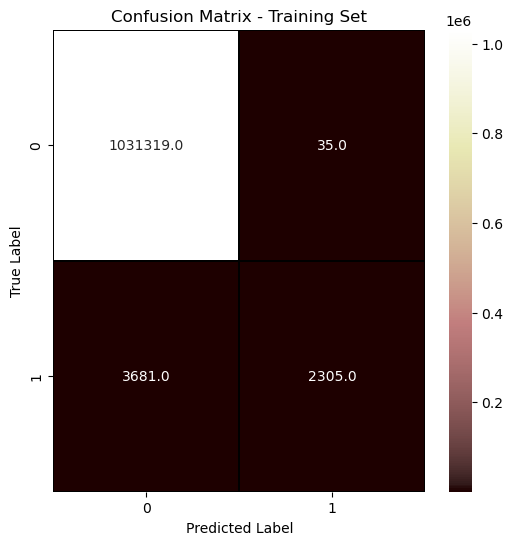

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.97      0.37      0.53      1520

    accuracy                           1.00    259335
   macro avg       0.98      0.68      0.77    259335
weighted avg       1.00      1.00      1.00    259335



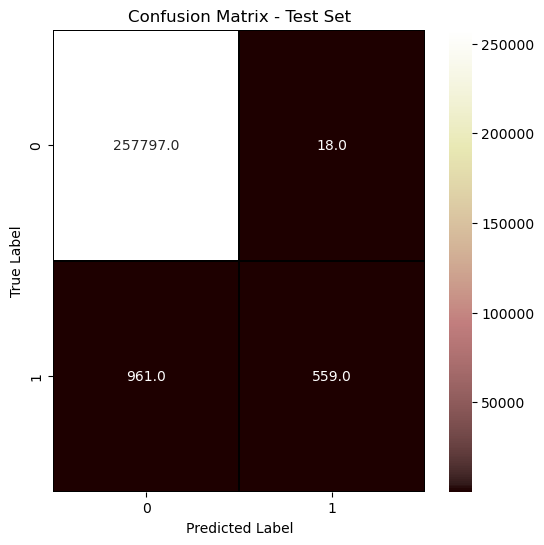

Classification Report for Training Set:
{'0': {'precision': 0.9964434782608695, 'recall': 0.9999660640284519, 'f1-score': 0.9982016634129486, 'support': 1031354.0}, '1': {'precision': 0.9850427350427351, 'recall': 0.38506515202138325, 'f1-score': 0.5536872447754023, 'support': 5986.0}, 'accuracy': 0.9964177608113058, 'macro avg': {'precision': 0.9907431066518023, 'recall': 0.6925156080249175, 'f1-score': 0.7759444540941755, 'support': 1037340.0}, 'weighted avg': {'precision': 0.9963776899475838, 'recall': 0.9964177608113058, 'f1-score': 0.9956365803061906, 'support': 1037340.0}}

Confusion Matrix for Training Set:
[[1031319      35]
 [   3681    2305]]

Classification Report for Test Set:
{'0': {'precision': 0.9962861051638983, 'recall': 0.9999301824952, 'f1-score': 0.9981048177121142, 'support': 257815.0}, '1': {'precision': 0.9688041594454073, 'recall': 0.36776315789473685, 'f1-score': 0.5331425846447305, 'support': 1520.0}, 'accuracy': 0.9962249599938304, 'macro avg': {'precision': 

In [69]:
try_model_xgboost = model_xgboost(x_train, y_train)
evaluation_results = evaluate_model(try_model_xgboost, x_train, y_train, x_test, y_test)

print("Classification Report for Training Set:")
print(evaluation_results['classification_report_train'])

print("\nConfusion Matrix for Training Set:")
print(evaluation_results['confusion_matrix_train'])

print("\nClassification Report for Test Set:")
print(evaluation_results['classification_report_test'])

print("\nConfusion Matrix for Test Set:")
print(evaluation_results['confusion_matrix_test'])

Classification Report:

Training Set:

- Precision: Precision for class 0 is 1.00, indicating that all predictions made by the model for class 0 are correct. Precision for class 1 is 0.99, meaning 99% of predictions made by the model for class 1 are correct.
- Recall: Recall for class 0 is 1.00, meaning the model can correctly identify all instances of class 0. Recall for class 1 is 0.39, indicating the model can only identify 39% of actual instances of class 1.
- F1-score: The F1-score for class 0 is 1.00, combining precision and recall into a balanced metric. The F1-score for class 1 is 0.55, reflecting a balance between precision and recall, although recall for class 1 is relatively low.
- Support: Number of instances in the training set for each class.

Test Set:

- Precision: Precision for class 0 is 1.00, indicating that all predictions made by the model for class 0 are correct. Precision for class 1 is 0.97, meaning 97% of predictions made by the model for class 1 are correct.
- Recall: Recall for class 0 is 1.00, meaning the model can correctly identify all instances of class 0. Recall for class 1 is 0.37, indicating the model can only identify 37% of actual instances of class 1.
- F1-score: The F1-score for class 0 is 1.00, combining precision and recall into a balanced metric. The F1-score for class 1 is 0.53, reflecting a balance between precision and recall, although recall for class 1 is relatively low.
- Support: Number of instances in the test set for each class.

# TUNING LOGISTIC REGRESSION

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1031354
           1       0.89      0.11      0.20      5986

    accuracy                           0.99   1037340
   macro avg       0.94      0.56      0.60   1037340
weighted avg       0.99      0.99      0.99   1037340



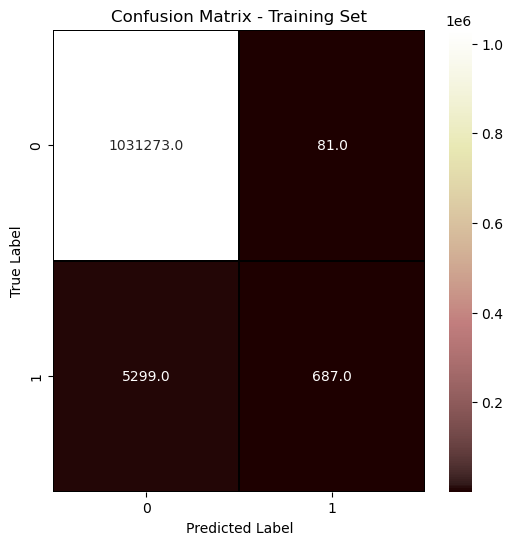

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.87      0.11      0.19      1520

    accuracy                           0.99    259335
   macro avg       0.93      0.55      0.59    259335
weighted avg       0.99      0.99      0.99    259335



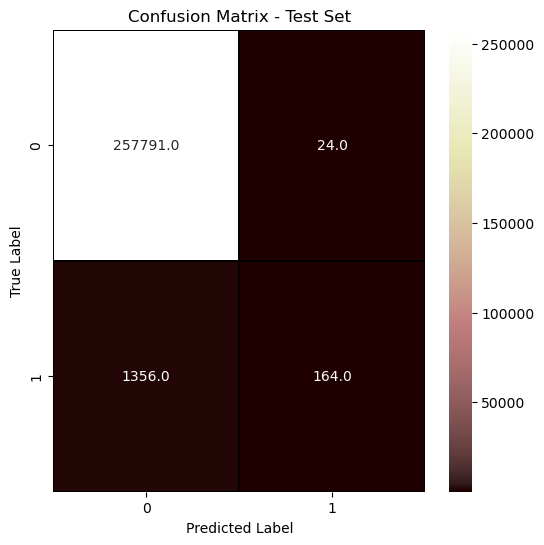


Classification Report (Training Set):
{'0': {'precision': 0.9948879576141358, 'recall': 0.9999214624658459, 'f1-score': 0.997398359515766, 'support': 1031354.0}, '1': {'precision': 0.89453125, 'recall': 0.11476779151353157, 'f1-score': 0.2034350014806041, 'support': 5986.0}, 'accuracy': 0.99481365800991, 'macro avg': {'precision': 0.9447096038070679, 'recall': 0.5573446269896888, 'f1-score': 0.6004166804981851, 'support': 1037340.0}, 'weighted avg': {'precision': 0.99430884637599, 'recall': 0.99481365800991, 'f1-score': 0.992816771356437, 'support': 1037340.0}}

Confusion Matrix (Training Set):
[[1031273      81]
 [   5299     687]]

Classification Report (Test Set):
{'0': {'precision': 0.9947674485909541, 'recall': 0.9999069099936001, 'f1-score': 0.997330558145473, 'support': 257815.0}, '1': {'precision': 0.8723404255319149, 'recall': 0.10789473684210527, 'f1-score': 0.1920374707259953, 'support': 1520.0}, 'accuracy': 0.9946786974376771, 'macro avg': {'precision': 0.9335539370614345,

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=model_logistic_regression(x_train, y_train),
                           param_grid=param_grid,
                           cv=3, 
                           scoring='accuracy',  
                           verbose=2,  
                           n_jobs=-1)  

grid_search.fit(x_train, y_train)

best_model_logistic = grid_search.best_estimator_

evaluation_results = evaluate_model(best_model_logistic, x_train, y_train, x_test, y_test)

print("\nClassification Report (Training Set):")
print(evaluation_results['classification_report_train'])

print("\nConfusion Matrix (Training Set):")
print(evaluation_results['confusion_matrix_train'])

print("\nClassification Report (Test Set):")
print(evaluation_results['classification_report_test'])

print("\nConfusion Matrix (Test Set):")
print(evaluation_results['confusion_matrix_test'])